# Stack Questions

## Fall2024: Overlapping tasks


You are given the start and end time of some tasks. The tasks are sorted according to their starting time.  
You can merge two tasks `A` and `B` if they are overlapping. That is, task `B` starts before the finishing time of task `A`.  
In that case, it becomes a single task having the ending time of task `A` or task `B` (depending upon which task finishes later).  
This task can be merged further with other tasks if the above condition satisfies (overlapping).  

You want to merge as many tasks as possible and minimize the total number of non-overlapping tasks.  

You are given a 2D array named `tasks` storing the start and end time of the tasks. The array is sorted according to the starting time of the tasks.  
Each row of the array stores two integer values:  
- The first value indicates the **start time** and the second value indicates the **end time** of a task.  
More specifically, the start and end time of the `i`th task is `tasks[i][0]` and `tasks[i][1]` respectively.  

---

### Your Task:
Write a function named `print_total_task(tasks)` that takes the `tasks` array as input and prints the start time and end time for each non-overlapping task according to the given format.  

**Note:**  
- The tasks should be printed in **decreasing order of start time**.
- Consider that the `Stack` class is already available with the following methods/functions implemented:  
  - `push(element)`  
  - `pop()`  
  - `peek()`  
  - `isEmpty()`  

  **Stack Underflow** and **Stack Overflow** exceptions return `None` (Python) or `null` (Java).  
  There is no need to write the `Stack` class.  

- You are allowed to create as many stacks as you want.  
- **You cannot create any new array.**  

### Example

#### Input:
```plaintext
tasks = [[1, 5],
         [2, 3],
         [4, 6],
         [7, 10],
         [9, 11],
         [12, 15]]


In [ ]:
# GIVEN---NO NEED TO WRITE
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

# ## Given stack class
class Stack:
    def __init__(self):
        self.top = None  # Represents the top of the stack--head here
        self.size = 0    # Tracks the size of the stack

    def isEmpty(self):
        return self.size == 0

    def push(self, data): # Prepend--head changes
        new_node = Node(data)
        new_node.next = self.top  # New node points to the current top
        self.top = new_node       # Update the top to the new node
        self.size += 1            # Increment size

    def pop(self): # remove top head--index 0
        if self.isEmpty():
            raise IndexError("Underflow: Pop from empty stack")
        popped_data = self.top.data  # Retrieve the data of the top node
        self.top = self.top.next     # Update the top to the next node
        self.size -= 1               # Decrement size
        return popped_data

    def peek(self):
        if self.isEmpty():
            raise IndexError("Underflow: Peek from empty stack")
        return self.top.data

In [ ]:
def print_total_task(tasks):
    # Stack to store the merged tasks
    merged_stack = Stack()

    # Iterate over the tasks
    for task in tasks:
        start = task[0]
        end = task[1]

        # If the stack is empty or the current task does not overlap with the top of the stack
        if merged_stack.isEmpty() or merged_stack.peek()[1]< start:
            # Push the current task as a new non-overlapping task
            merged_stack.push((start, end))
        else:
            # Merge the current task with the top task in the stack
            top_start, top_end = merged_stack.pop()
            merged_stack.push((min(top_start,start), max(top_end, end)))

    # # Print the tasks in descending order of start time
    while not merged_stack.isEmpty():
        start, end = merged_stack.pop()
        print(f"{start}, {end}")

# Example Usage
tasks = [
    [1, 5],
    [2, 3],
    [4, 6],
    [7, 10],
    [9, 11],
    [12, 15]
]

print_total_task(tasks)

12, 15
7, 11
1, 6


## Fall23- Q3 (2): conditional_reverse

Consider that a `MidStack` class has been created containing the `push(element)`, `pop()`, `peek()`, and `isEmpty()` functions. No need to implement the `MidStack` class. The `MidStack` class implements a singly linked list-based Stack, hence overflow is not possible. The `pop()` and `peek()` functions return `None` in case of underflow.

Complete the function `conditional_reverse` which will take an object of `MidStack` that contains some integer values.
- The function returns a new stack which will contain the values in reverse order from the given stack, with the **exception that if consecutive numbers are the same, it picks only one from them.**

- You cannot use any other data structure except `MidStack`.
- Remember that a stack has no other functions than `push`, `pop`, `peek`, and `isEmpty`.

### Sample Input and Output

| **Stack (Right most is the top)**                  | **Returned Stack (Right most is the top)**  | **Explanation**                                            |
|----------------------------------------------------|--------------------------------------------|------------------------------------------------------------|
| Stack: 10, 10, 20, 20, 30, 10, 50                  | Stack: 50, 10, 30, 20, 10                  | Consecutive 20 and 10 are not present in the output reversed stack. |
| Top = 50                                           | Top = 10                                   |                                                            |


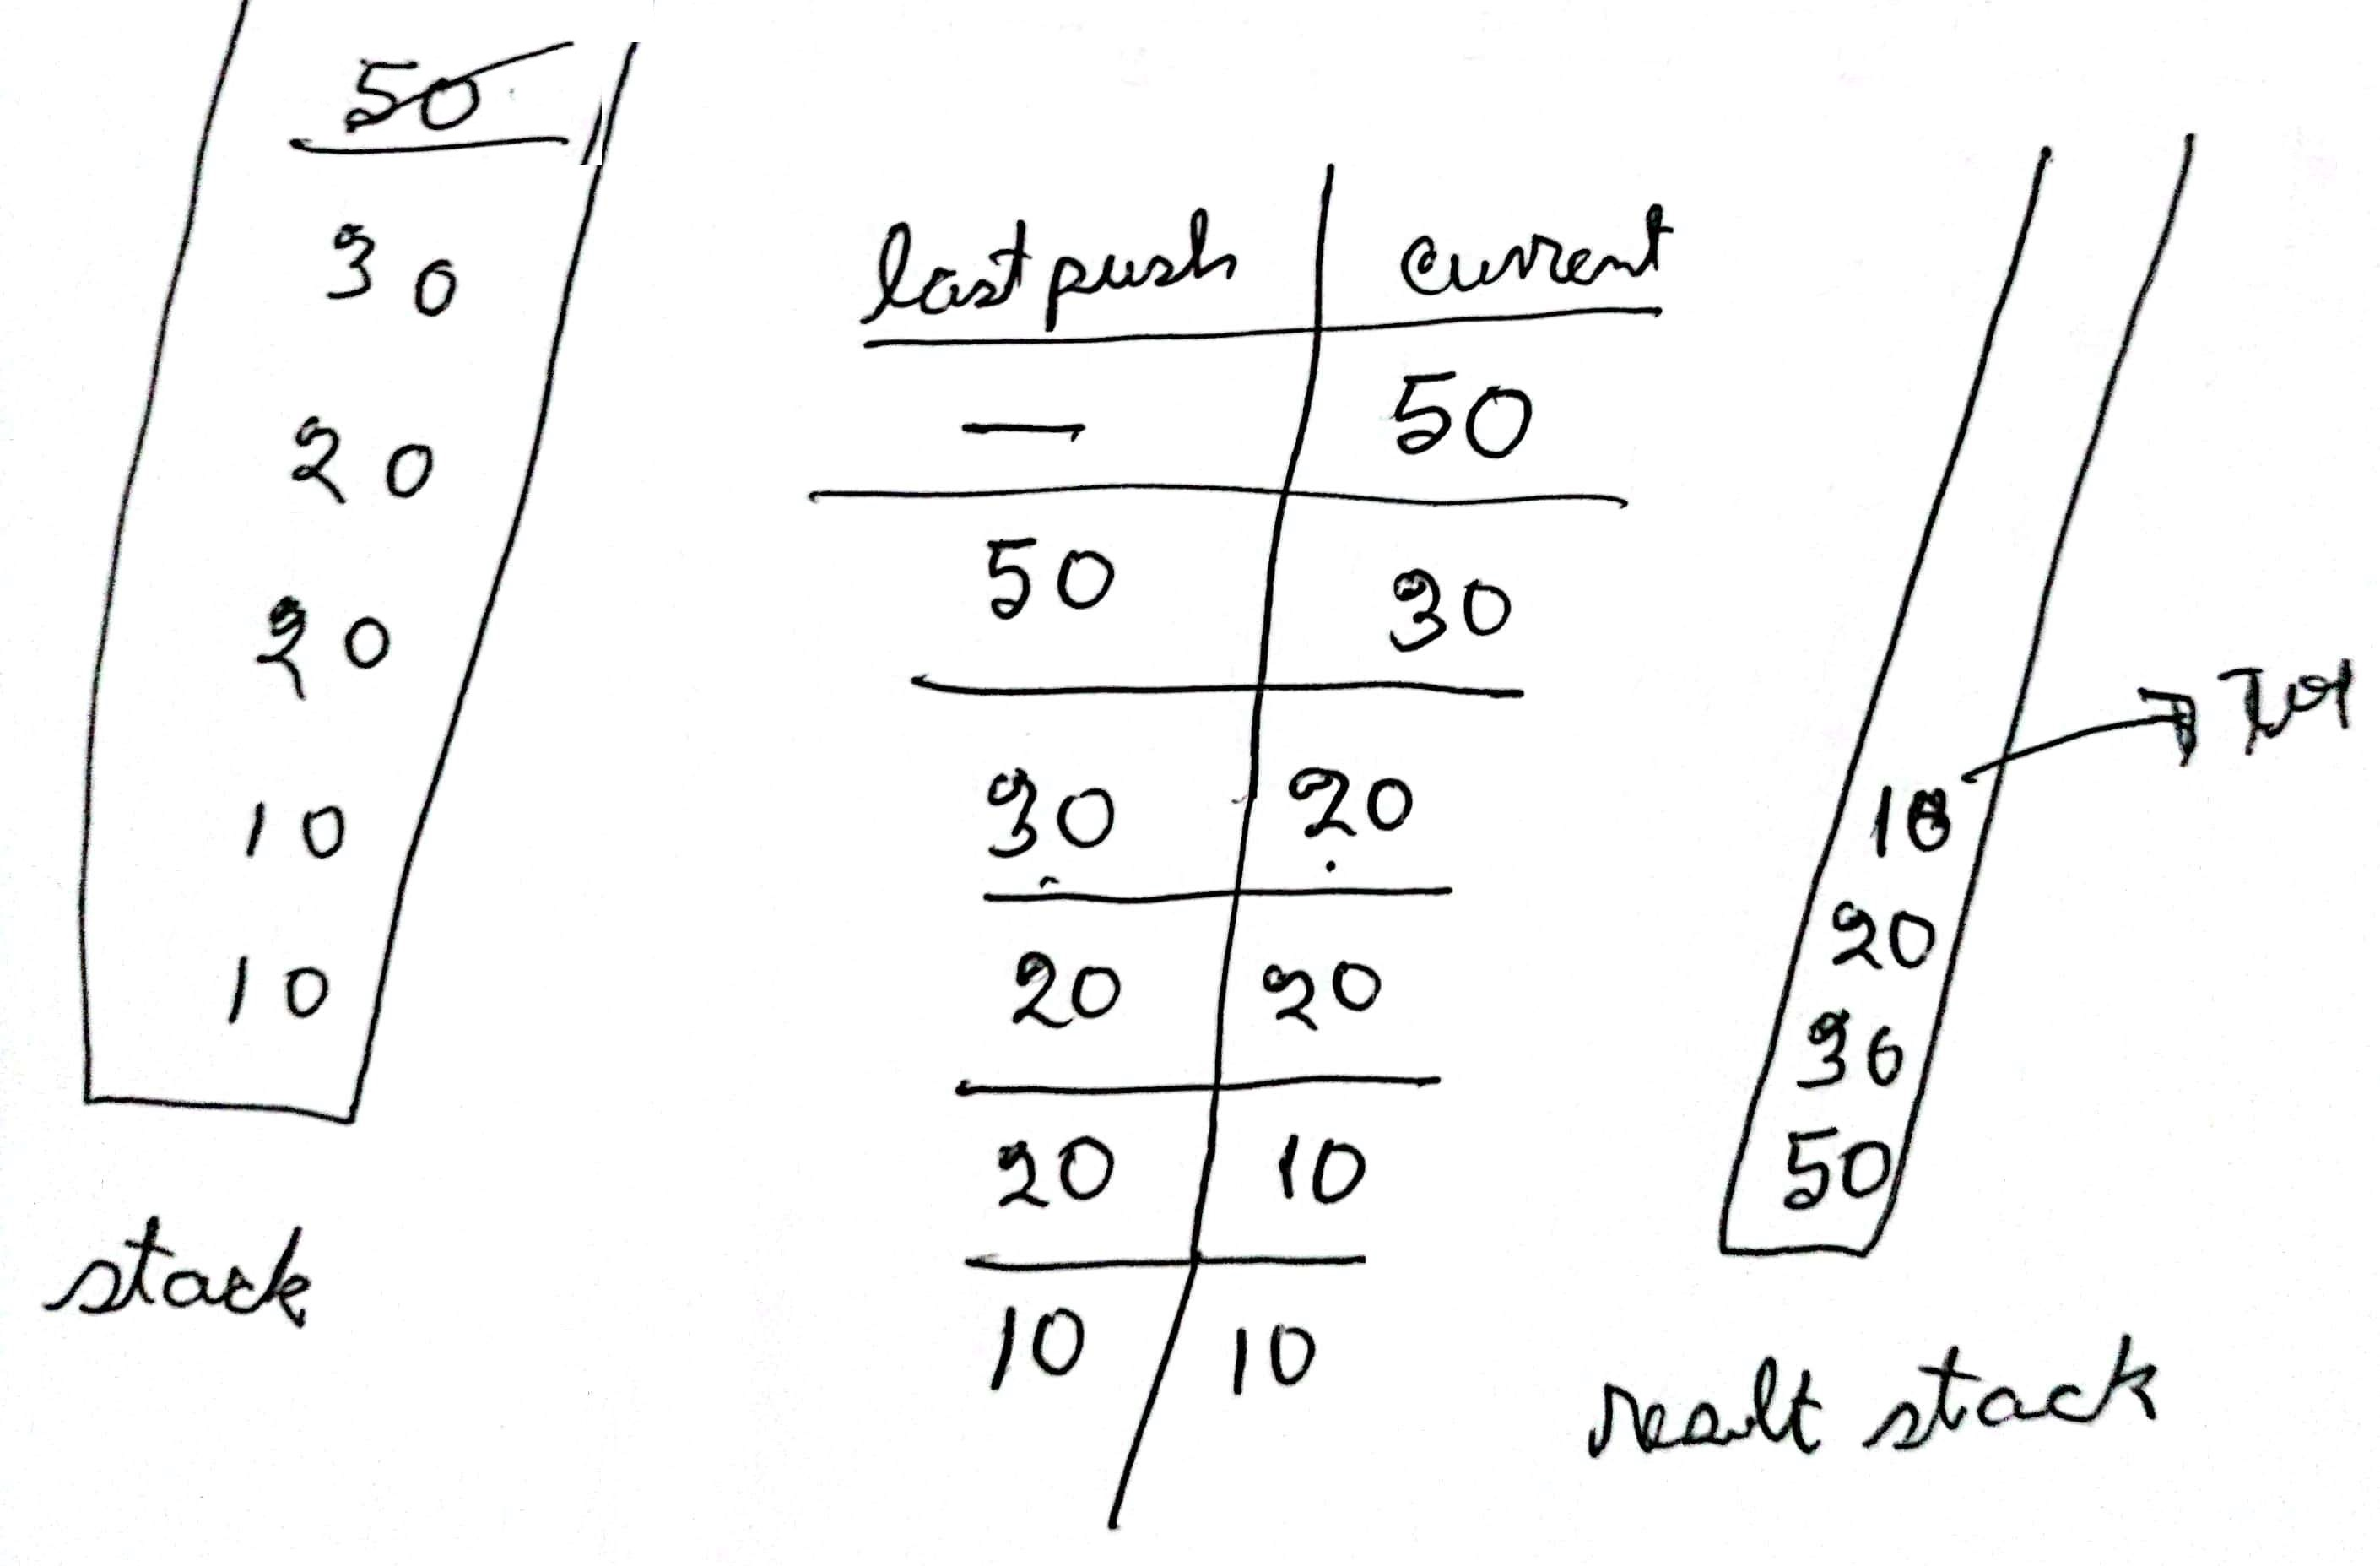

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

# ## Given midstack class
class MidStack:
    def __init__(self):
        self.top = None  # Represents the top of the stack--head here
        self.size = 0    # Tracks the size of the stack

    def isEmpty(self):
        return self.size == 0

    def push(self, data): # Prepend--head changes
        new_node = Node(data)
        new_node.next = self.top  # New node points to the current top
        self.top = new_node       # Update the top to the new node
        self.size += 1            # Increment size

    def pop(self): # remove top head--index 0
        if self.isEmpty():
            raise IndexError("Underflow: Pop from empty stack")
        popped_data = self.top.data  # Retrieve the data of the top node
        self.top = self.top.next     # Update the top to the next node
        self.size -= 1               # Decrement size
        return popped_data

    def peek(self):
        if self.isEmpty():
            raise IndexError("Underflow: Peek from empty stack")
        return self.top.data

In [ ]:
# Function to reverse the stack with the condition to remove consecutive duplicates
def conditional_reverse(stack):
    # Creating a new MidStack to store the reversed result
    result_stack = MidStack()

    # Temporary variable to hold the last pushed element to avoid consecutive duplicates
    last_pushed = None

    # Iterate through the original stack
    while not stack.isEmpty():
        # Pop an element from the original stack
        current = stack.pop()

        # Only push the element if it's not the same as the last pushed one
        if current != last_pushed:
            result_stack.push(current)
            last_pushed = current

    return result_stack

# Create an instance of MidStack and push elements
stack = MidStack()
stack.push(10)
stack.push(10)
stack.push(20)
stack.push(20)
stack.push(30)
stack.push(10)
stack.push(50)

# Function to print the stack without altering the original
def print_stack(s):
    temp_stack = MidStack()  # Temporary stack for copying
    elements = []  # To store the elements in a readable format

    # Copy the original stack to a temporary stack while preserving the original
    while not s.isEmpty():
        temp_stack.push(s.pop())

    # Transfer elements back to the original stack and collect them in order
    while not temp_stack.isEmpty():
        elem = temp_stack.pop()
        s.push(elem)  # Push back to the original stack
        elements.append(elem)  # Collect element for printing

    return elements

print("Original Stack (Top to Bottom):", print_stack(stack))

# Perform conditional_reverse
result_stack = conditional_reverse(stack)
print("Returned Stack (Top to Bottom):", print_stack(result_stack))

Original Stack (Top to Bottom): [10, 10, 20, 20, 30, 10, 50]
Returned Stack (Top to Bottom): [50, 10, 30, 20, 10]


## Summer24 Q3: Do_Adjacent_Swap

You are given a stack of some integer elements, `st`. Your task is to swap the adjacent elements of the stack and return the modified stack.  

- If the number of elements in the stack is **odd**, **keep the topmost element as it is** and swap the other adjacent elements.  

Now write a function `Do_Adjacent_Swap(st)` that completes the given task and returns the modified stack.  

The `st` is an object of the **“Stack”** class which is implemented by a **singly linear linked list**, and consider that the following methods of the **“Stack”** class are already implemented for you:  
- `push(element)`
- `pop()`
- `peek()`
- `isEmpty()`  

You cannot use any other data structures other than stack. The **“Top”** pointer of the Stack class is **NOT** accessible to you.  
You can use just the above four methods of the Stack class. You can create as many stacks as you need for this task.  

#### Sample Input/Output Table

| **Original Stack**                         | **Modified Stack**                      | **Explanation**                                                                                  |
|--------------------------------------------|-----------------------------------------|--------------------------------------------------------------------------------------------------|
| 8(Top) → 7 → 6 → 5 → 4 → 3 → 2 → 1         | 7(Top) → 8 → 5 → 6 → 3 → 4 → 1 → 2      | Adjacent pairs (8,7), (6,5), (4,3), (2,1) are swapped. The stack has an even number of elements. |
| 7(Top) → 6 → 5 → 4 → 3 → 2 → 1             | 7(Top) → 5 → 6 → 3 → 4 → 1 → 2          | Adjacent pairs (6,5), (4,3), (2,1) are swapped. The topmost element (7) is kept as is.           |


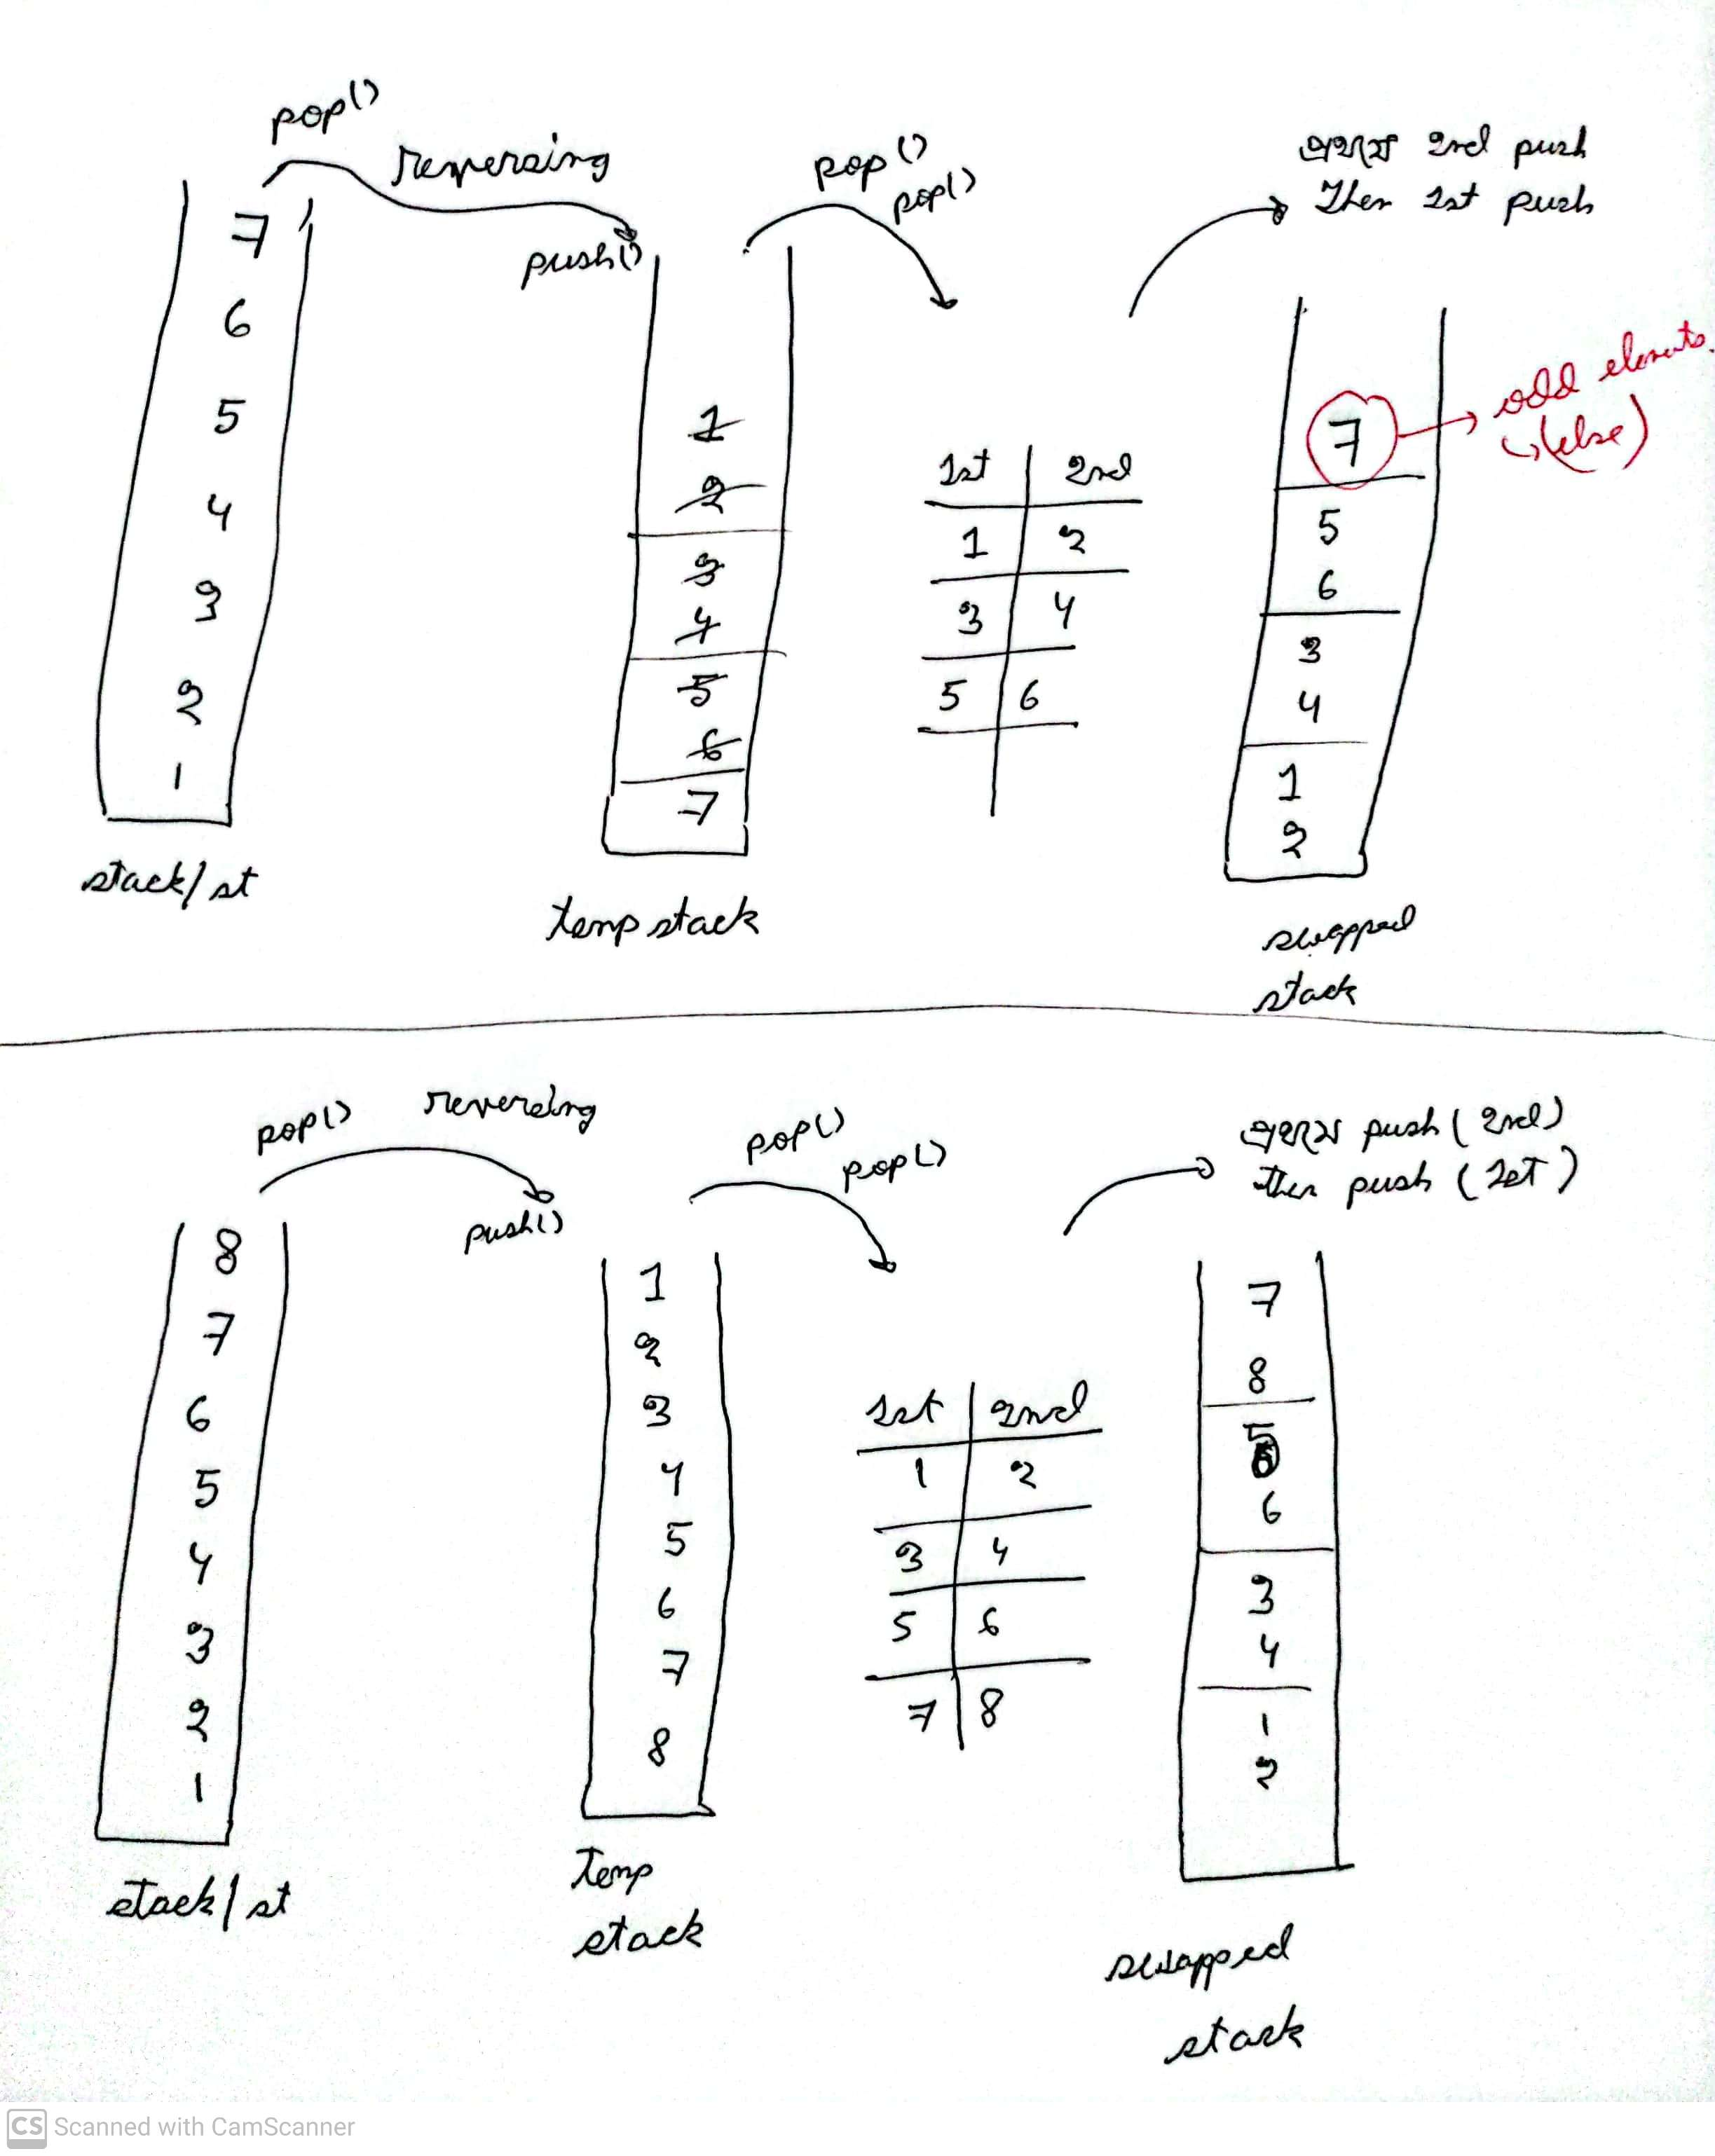

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

# ## Given midstack class
class MidStack:
    def __init__(self):
        self.top = None  # Represents the top of the stack--head here
        self.size = 0    # Tracks the size of the stack

    def isEmpty(self):
        return self.size == 0

    def push(self, data): # Prepend--head changes
        new_node = Node(data)
        new_node.next = self.top  # New node points to the current top
        self.top = new_node       # Update the top to the new node
        self.size += 1            # Increment size

    def pop(self): # remove top head--index 0
        if self.isEmpty():
            raise IndexError("Underflow: Pop from empty stack")
        popped_data = self.top.data  # Retrieve the data of the top node
        self.top = self.top.next     # Update the top to the next node
        self.size -= 1               # Decrement size
        return popped_data

    def peek(self):
        if self.isEmpty():
            raise IndexError("Underflow: Peek from empty stack")
        return self.top.data

def Do_Adjacent_Swap(st):
    if st.isEmpty():
        return st

    rev_stack = MidStack()
    result_stack = MidStack()

    # Reverse stack:
    # Move elements from original stack to temp_stack to access bottom elements first
    size = 0
    while not st.isEmpty():
        rev_stack.push(st.pop())
        size+=1

    if size%2==0:
        for _ in range(size//2):
            first = rev_stack.pop()
            second = rev_stack.pop()
            result_stack.push(second)
            result_stack.push(first)
    else:
        result_stack.push(rev_stack.pop()) # getting the last odd element
        for _ in range((size-1)//2):
            first = rev_stack.pop()
            second = rev_stack.pop()
            result_stack.push(second)
            result_stack.push(first)

    return result_stack

def print_stack(st):
    temp_stack = MidStack()
    print("Stack (top to bottom):", end=" ")

    # Move elements to temp_stack to access them in order
    while not st.isEmpty():
        temp_stack.push(st.pop())

    # Print and restore elements back to the original stack
    first = True
    while not temp_stack.isEmpty():
        elem = temp_stack.pop()
        if first:
            print(f"{elem}(Top)", end=" ")
            first = False
        else:
            print(f"→ {elem}", end=" ")
        st.push(elem)

    print()

# Testing the Do_Adjacent_Swap function

# Test case 1
print("Test Case 1")
st1 = MidStack()
for element in [8, 7, 6, 5, 4, 3, 2, 1]:  # Push elements to stack
    st1.push(element)
print("Original Stack:")
print_stack(st1)
result1 = Do_Adjacent_Swap(st1)
print("Modified Stack:")
print_stack(result1)
print("\n")

# Test case 2
print("Test Case 2")
st2 = MidStack()
for element in [7, 6, 5, 4, 3, 2, 1]:  # Push elements to stack
    st2.push(element)
print("Original Stack:")
print_stack(st2)
result2 = Do_Adjacent_Swap(st2)
print("Modified Stack:")
print_stack(result2)
print("\n")

Test Case 1
Original Stack:
Stack (top to bottom): 8(Top) → 7 → 6 → 5 → 4 → 3 → 2 → 1 
Modified Stack:
Stack (top to bottom): 7(Top) → 8 → 5 → 6 → 3 → 4 → 1 → 2 


Test Case 2
Original Stack:
Stack (top to bottom): 7(Top) → 6 → 5 → 4 → 3 → 2 → 1 
Modified Stack:
Stack (top to bottom): 7(Top) → 5 → 6 → 3 → 4 → 1 → 2 





## Spring 24- Q3 (1): Simulation

Suppose that an intermixed sequence of stack push and pop operations are performed.  
**The pushes push the integers 0 through 9 in order;** the pops print out the return value.  
Which of the following sequences could not occur for push and pop operation? Write all the correct answers.

#### Options:
- **A**: 1 2 3 4 5 6 9 8 7 0  
- **B**: 0 4 6 5 3 8 1 7 2 9  
- **C**: 1 4 7 9 8 6 5 3 0 2  
- **D**: 2 1 4 3 6 5 8 7 9 0  




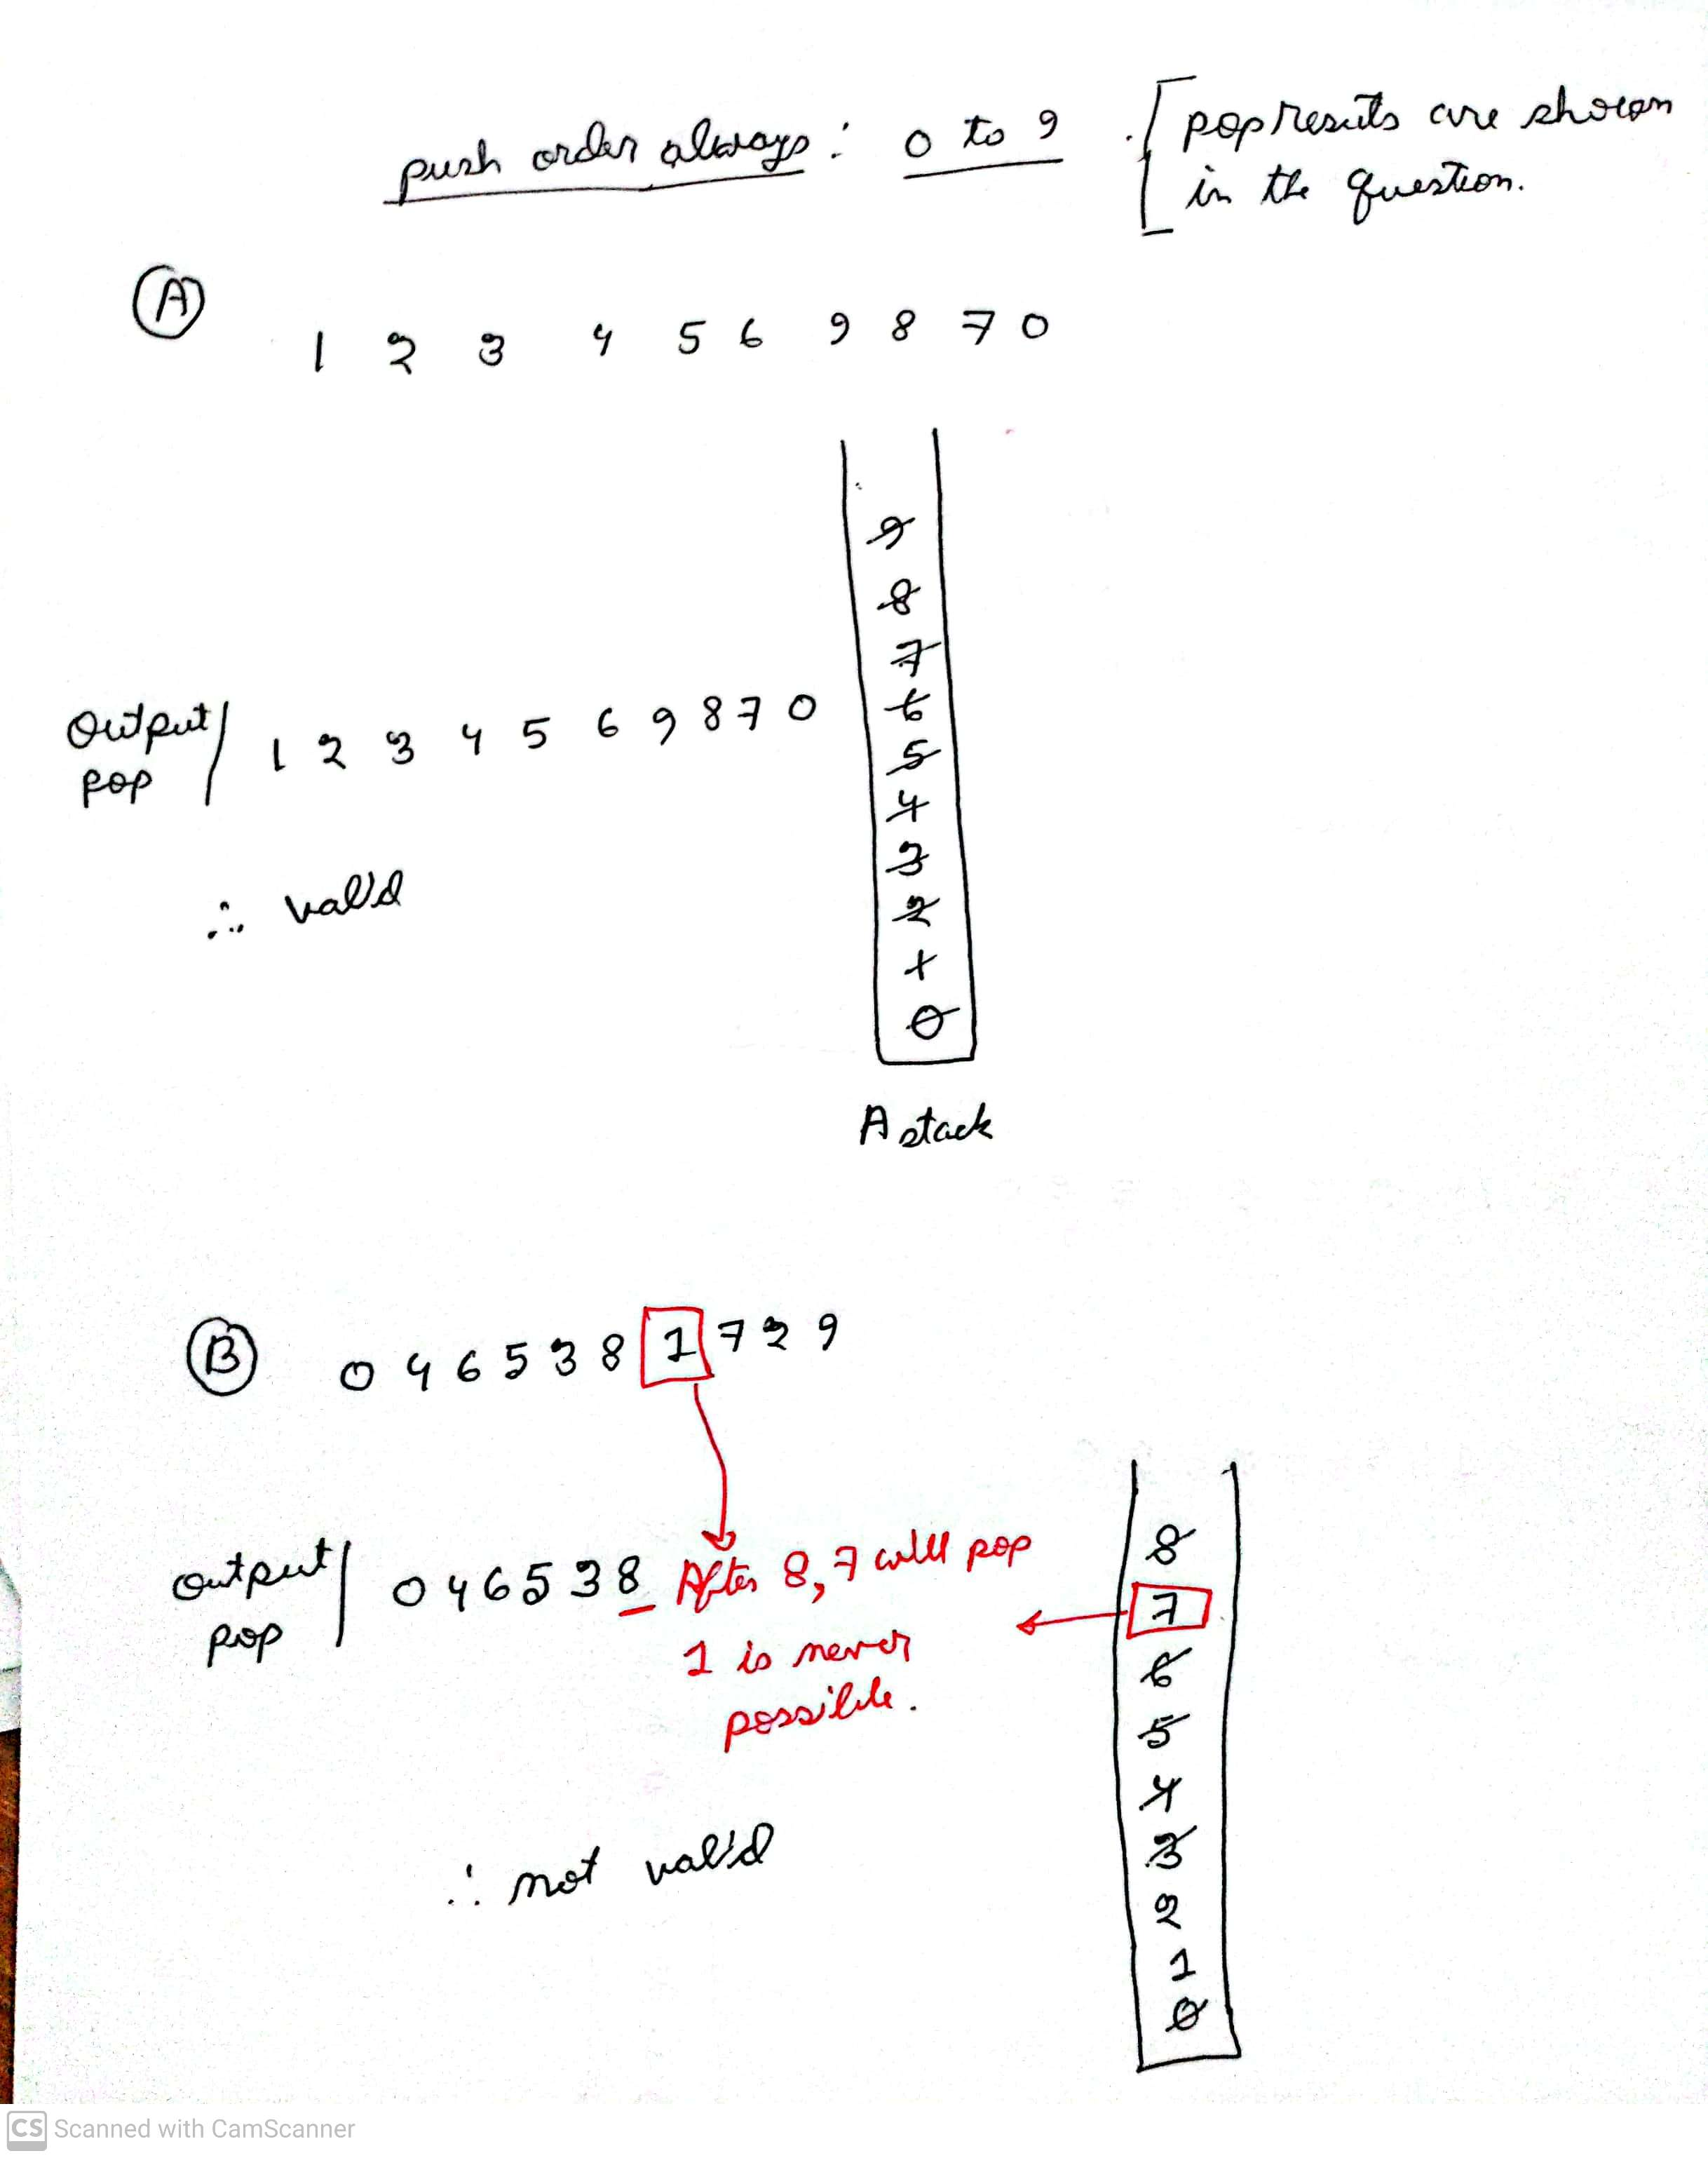

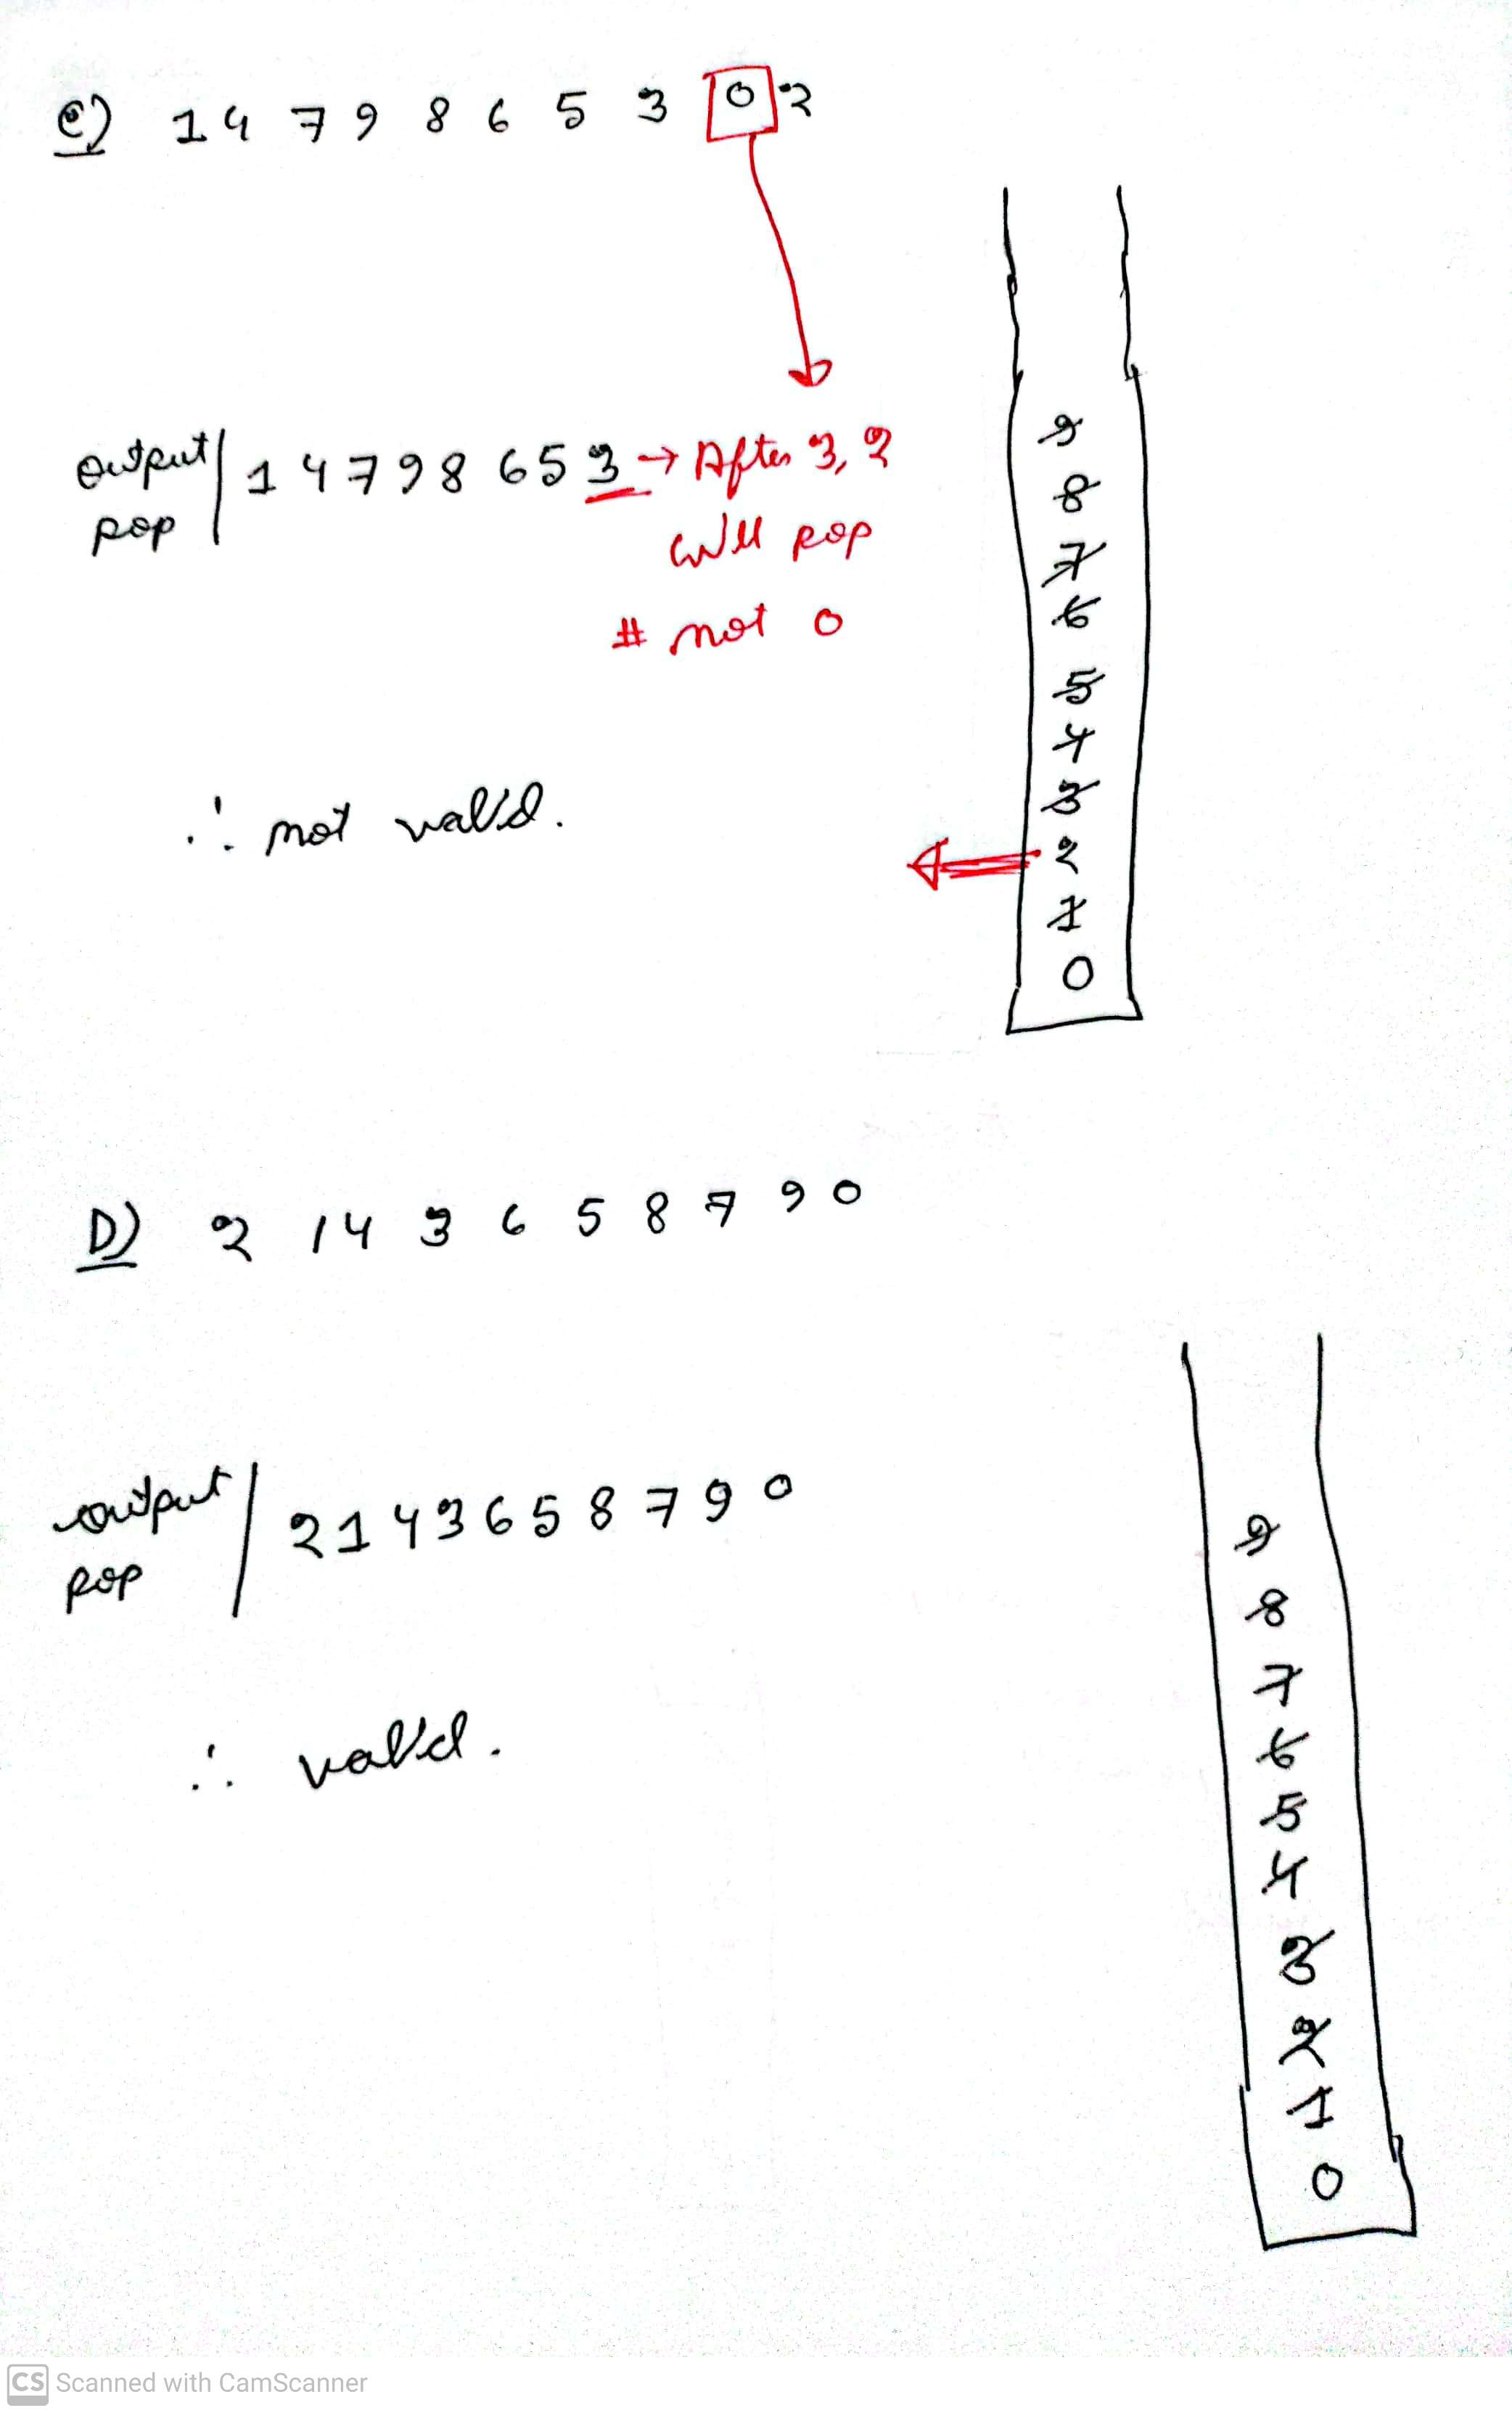

# Queue and stack mixed

## Spring2024 Q3: Dance Pairing using Stack and Queue

You are given a **Stack** of people. They should be paired off as **man with woman** and **woman with man**. If a male and a female are consecutive in the stack, they get paired immediately.

- If there are **consecutive females** found without any subsequent males, then the **spare females should be saved in a Queue** for future pairing.
- If there are **consecutive males** found without any subsequent females, we try to **pair a male with the first spare female** (if available) from the Queue.
- If no spare female is available, then the male is discarded.
- The same logic applies to consecutive females without any subsequent males.

### Given:
The **Stack** class and the **Queue** class are implemented for you.  
The public instance methods in the **Stack** class are:
- `push()`
- `pop()`
- `peek()`
- `isEmpty()`

The public instance methods in the **Queue** class are:
- `enq()`
- `deq()`
- `peek()`
- `isEmpty()`

In both classes:
- `isEmpty()` returns a boolean value.
- `peek()` and `pop()` return `None` for underflow.
- All other members of both classes are **private**.

You can **only use the public instance methods**.  
You **cannot** use any data structure other than **Stack and Queue**.  
No need to consider the **overflow exception** for both Stack and Queue classes.

### Task:
Complete the given method `dance_pair(st)` that takes a **Stack** and prints every **male-female pair**.

Every **male and female** are written in this format:  
`M_id` (for males) and `F_id` (for females).  

A helper method `id_gender_extractor(s)` is implemented for you that **extracts the ID and gender** from a string `s`.

### Provided Method:
```python
def id_gender_extractor(s):
    if s != None:
        return s[0], s[2:]  # gender, id
    else:
        return None, None


In [ ]:
# Implementing the given Stack class
class Stack:
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop() if not self.isEmpty() else None

    def peek(self):
        return self.items[-1] if not self.isEmpty() else None

    def isEmpty(self):
        return len(self.items) == 0

# Implementing the given Queue class
class Queue:
    def __init__(self):
        self.items = []

    def enq(self, item):
        self.items.append(item)

    def deq(self):
        return self.items.pop(0) if not self.isEmpty() else None

    def peek(self):
        return self.items[0] if not self.isEmpty() else None

    def isEmpty(self):
        return len(self.items) == 0

In [ ]:
def dance_pair(st):
    female_queue = Queue()  # Queue to store spare females

    while not st.isEmpty():
        person = st.pop()
        gender, id = id_gender_extractor(person)

        if gender == 'M':
            # If male, check if there is a female right below it in the stack
            if not st.isEmpty():
                next_person = st.peek()
                next_gender, next_id = id_gender_extractor(next_person)
                if next_gender == 'F':  # If the next one is female, pair them
                    st.pop()
                    print(f"{id} and {next_id} are paired together")
                else:
                    # If no female immediately below, try to pair from the queue
                    if not female_queue.isEmpty():
                        female = female_queue.deq()
                        _, female_id = id_gender_extractor(female)
                        print(f"{female_id} and {id} are paired together")
                    else:
                        # If no female is available, the male is discarded
                        pass
            else:
                # If male is the last element in the stack, try to pair with queue
                if not female_queue.isEmpty():
                    female = female_queue.deq()
                    _, female_id = id_gender_extractor(female)
                    print(f"{female_id} and {id} are paired together")
                else:
                    # If no available female, discard the male
                    pass
        else:  # gender == 'F'
            # If female, check if next element in stack is male
            if not st.isEmpty():
                next_person = st.peek()
                next_gender, next_id = id_gender_extractor(next_person)
                if next_gender == 'M':  # If the next one is male, pair them
                    st.pop()
                    print(f"{id} and {next_id} are paired together")
                else:
                    # If next one isn't a male, store the female in queue
                    female_queue.enq(person)
            else:
                # If last element in stack is female, store in queue
                female_queue.enq(person)

# Helper function to extract gender and ID
def id_gender_extractor(s):
    if s is not None:
        return s[0], s[2:]  # (gender, id)
    return None, None


# Sample input stack
st = Stack()
st.push("F_18")
st.push("F_9")
st.push("M_7")
st.push("M_1")
st.push("M_19")
st.push("M_3")
st.push("F_5")
st.push("F_4")
st.push("F_20")
st.push("M_10")

dance_pair(st)

10 and 20 are paired together
5 and 3 are paired together
4 and 19 are paired together
7 and 9 are paired together


#Hashing

## Spring2024 -Q2: final
You have an interesting hash function for a hash table. The hash-function takes a **singly linked list** where node values are characters and the characters are put in the list using some unknown permutation.

The hash function takes a string key as input and the head of the linked list. Then the hash for the key is the **mod by 10** of the **sum of the indexes of the characters of the list** in the string.

Implement this hash function.

* If any node value is not present in the string, then consider its index -1. * * If any character of the string occurs multiple times, then consider the index value of the **last occurrence**.
* Consider the Node class has elem and next variable.

You can not use any built-in function except range.


No need to write the Node class. You can not use any data structures other than the given data structures.


```
# Python Notation:
def hash(list, st):
```

| Sample Input      | Sample Output | Explanation                                                                 |
|-------------------|---------------|-----------------------------------------------------------------------------|
| hash(list, st)    | 7             | Index of D is 2 and A is 3. T is not present in the string hence -1.       |
| list = D → A → T → A |               | (2 + 3 -1 + 3) % 10 = 7                                                    |
| st = “SADA”       |               |                                                                             |



In [ ]:
def hash(list, st):
    # Initialize sum to 0
    total_sum = 0

    # Traverse the linked list
    current = list # taking the head of the LL
    while current is not None:
        char = current.elem
        # Find the index of the character in the string
        index = -1  # Default to -1 if not found
        for i in range(len(st) - 1, -1, -1):  # Loop through the string from the end to find the last occurrence
            if st[i] == char:
                index = i
                break
        total_sum += index
        current = current.next

    # Return the sum modulo 10
    return total_sum % 10

# Define a simple Node class for testing purposes
class Node:
    def __init__(self, elem, next=None):
        self.elem = elem
        self.next = next

# Sample linked list: D → A → T → A
list_head = Node('D', Node('A', Node('T', Node('A'))))

# Sample string
st = "SADA"

# Call the hash function
result = hash(list_head, st)

# Print the result
print(result)

7


## Fall2023 Q4 -- Hash-final
Suppose you are given a hash function called check(). In this hashing, forward chaining is used  
for resolving conflict, and a 3-length array of singly linked lists is used as the hash table. In the  
singly linked list, each node has a next pointer, a string key and a string value, for example:  
(“7B12C” (key), “CSE220” (value)). The hash-table stores this key-value pair. The check  
function is given below:  
*For your reference ASCII value of A is 65.*  

```python
def check(key):
    v = 0
    for i in key:
        if i.isnumeric():
            v = v + int(i)
        else:
            v = v + ord(i)
    return v % 3
```

I. What is the hashed-index of (“4G14”, “MNS”) key-value pair in the above hashTable?  

II. Implement a function remove(hashTable, key) that takes a key and a hash-table as  
parameters. The function removes the key-value pair from the aforementioned hashtable if such a  
key-value pair (whose key matches the key passed as argument) exists in the hashtable and return  
the table. If the key does not exist, the function returns the same hash table.  

Consider, Node class, hash_function and hashTable are given to you. You just need to complete  
the remove(hashTable, key) function.  


```python
class Node:
    def __init__(self, key, value, next=None):
        self.key, self.value, self.next = key, value, next

# Python Notation:
def remove(hashTable, key):
    # To do

```
| **Input Table**                                      | **Returned Table**                                      |
|------------------------------------------------------|---------------------------------------------------------|
| 0: (“13D”, “ZMD”) → (“10A”, “ABW”)                   | 0: (“13D”, “ZMD”) → (“10A”, “ABW”)                      |
| 1: (“31B”, “NZF”)                                    | 1: (“31B”, “NZF”)                                       |
| 2: (“2A4”, “RAK”) → (“C7B”, “FAF”) → (“1A2”, “MNY”)  | 2: (“2A4”, “RAK”) → (“1A2”, “MNY”)                      |

**Function call:**  
`remove(hashTable, key="C7B")`




### I. Hashed Index Calculation of ("4G14", "MNS")

#### Characters Breakdown:
- `'4'` → Numeric → `4`
- `'G'` → ASCII → `71` (ASCII value of `G`)
- `'1'` → Numeric → `1`
- `'4'` → Numeric → `4`

#### Sum Calculation:
\[
4 + 71 + 1 + 4 = 80
\]

#### Hashed Index Calculation:
\[
80 \% 3 = 2
\]

### Final Answer:
The hashed index of the key-value pair `("4G14", "MNS")` is **2**.


```
class Node:
def __init__(self, key, value, next=None):
self.key, self.value, self.next = key, value, next

Python Notation:
def remove(hashTable, key):
# To Do


# This is formatted as code
```



In [ ]:
class Node:
    def __init__(self, key, value=None, next=None):
        self.key = key
        self.value = value
        self.next = next

def check(key):
    """Hash function to calculate the index."""
    v = 0
    for i in key:
        if i.isnumeric():
            v += int(i)
        else:
            v += ord(i)
    return v % 3

def insert(hash_table, key, value):
    """Insert a key-value pair into the hash table."""
    size = len(hash_table)
    index = check(key)

    # Create a dummy head node if the bucket is empty
    if hash_table[index] is None:
        hash_table[index] = Node(None)  # Dummy head node

    # prepend after dummy head
    newNode = Node(key, value)

    predecessor =  hash_table[index] # predecessor is dummy head
    # print("predecessor",predecessor.key, predecessor.value)
    successor = predecessor.next

    newNode.next = successor  # Link the successor
    predecessor.next = newNode  # Link the predecessor

def print_hash_table(hash_table):
    """Print the hash table."""
    i = 0  # Manual index tracking
    for node in hash_table:
        print(f"{i}:", end=" ")
        current = node
        while current and current.next:
            print(f"({current.next.key}, {current.next.value})", end=" → ")
            current = current.next
        print("None")  # End of the linked list
        i += 1  # Increment the index
    print()


def remove(hash_table, rem_key): # QUIZ SOLUTION
    """Remove a key from the hash table."""
    index = check(rem_key) # Calculated the hash index


    predecessor = hash_table[index]# head i = 0 # Start at the dummy head
    current_node = predecessor.next  # Starting after dummy head j = i+1

    # Traverse the chain to find the node to remove
    while current_node!=None:
        if current_node.key == rem_key:# here the current_node will be rem_node
            # Bypass the node to remove it
            succesor = current_node.next
            predecessor.next = succesor
            print(f"Removed ({current_node.key}, {current_node.value})")
            return
        predecessor = current_node # i++
        current_node = current_node.next # j++

###########################################################################
# Initialize the hash table
size = 3
hash_table = [None] * size

# Insert data
key_val_pairs = [
    ("13D", "ZMD"), ("10A", "ABW"),
    ("31B", "NZF"),
    ("2A4", "RAK"), ("C7B", "FAF"), ("1A2", "MNY")
]

for key, val in key_val_pairs:
    insert(hash_table, key, val)

# Print the original hash table
print("Original table before remove:")
print_hash_table(hash_table)

# Remove a key
key_to_remove = "C7B"
remove(hash_table, key_to_remove)

# Print the modified hash table
print("Modified table after remove:")
print_hash_table(hash_table)


Original table before remove:
0: (10A, ABW) → (13D, ZMD) → None
1: (31B, NZF) → None
2: (1A2, MNY) → (C7B, FAF) → (2A4, RAK) → None

Removed (C7B, FAF)
Modified table after remove:
0: (10A, ABW) → (13D, ZMD) → None
1: (31B, NZF) → None
2: (1A2, MNY) → (2A4, RAK) → None



# Linked List questions

## Fall 2024: Reverse and swap
You are given a non-dummy-headed, singly linear linked list containing positive integers.  
Your task is to complete the given method `reverseAndSwap()` that takes the head of the linked list  
and an integer `i` as input and returns the head of the modified list.

---

### Your Task:
1. **Reverse** the list from index `0` to `i`.
2. **Swap** the two parts of the list:
   - The unchanged part from index `i + 1` to `total_nodes - 1` will come **before** the reversed part from index `0` to `i` in the new list.  
     *(where `total_nodes = number of nodes in the linked list`)*

---

#### Notes:
- You can assume that the index `i` will always be in the range `0` to `total_nodes - 1`.
- Assume `Node` class has `elem` and `next` variables.
- **Do not use any other data structure other than the given linked list**, i.e., you **cannot create a new linked list**.

---

### Example

| **Sample Input** | **Sample Output** | **Explanation** |
|-------------------|-------------------|------------------|
| `5 → 7 → 6 → 3 → 8 → 2 → 1`<br>`i = 3` | `8 → 2 → 1 → 3 → 6 → 7 → 5` | The list is reversed from index 0 to 3, producing `3 → 6 → 7 → 5`. The unchanged part (`8 → 2 → 1`) now sits before the reversed part, producing the output list. |
| `5 → 7 → 6 → 3 → 8 → 2 → 1`<br>`i = 0` | `7 → 6 → 3 → 8 → 2 → 1 → 5` | The list is reversed in index 0, producing `5`. The unchanged part (`7 → 6 → 3 → 8 → 2 → 1`) now sits before the reversed part, producing the output list. |
| `5 → 7 → 6 → 3 → 8 → 2 → 1`<br>`i = 6` | `1 → 2 → 8 → 3 → 6 → 7 → 5` | The list is reversed from index 0 to 6, and there is no part from the original list left unchanged. |
| `5 → 7 → 6 → 3 → 8 → 2 → 1`<br>`i = 5` | `1 → 2 → 8 → 3 → 6 → 7 → 5` | The list is reversed from index 0 to 5, producing `2 → 8 → 3 → 6 → 7 → 5`. The only node remaining (`Node 1`) comes before the reversed part, producing the output list. |

---


In [ ]:
#WIth nodeAt()
class Node:
  def __init__(self,elem,next = None):
    self.elem,self.next = elem,next

def createList(arr):
  head = Node(arr[0])
  tail = head
  for i in range(1,len(arr)):
    newNode = Node(arr[i])
    tail.next = newNode
    tail = newNode
  return head

def printLinkedList(head):
  temp = head
  while temp != None:
    if temp.next != None:
      print(temp.elem, end = '-->')
    else:
      print(temp.elem)
    temp = temp.next
  print()

# writing node_at function correctly
# or traversing to ith node - 2 marks
def node_at(head,idx):
  temp = head
  for i in range(idx):
    temp = temp.next
  return temp

# reversing the list correctly - 3 marks
def reverse(head):
  new_head = None
  curr = head
  while curr != None:
    next = curr.next
    curr.next = new_head
    new_head = curr
    curr = next
  return new_head

def reverseAndSwap(head, i):
  # seperating two parts corretly - 1 marks
  ith_node = node_at(head,i)
  part_b = ith_node.next
  ith_node.next = None
  part_a = head

  #correctly reversing from idx 0 to i - 1 marks
  #### if they reverse correctly without using helper function - 4 marks
  part_a_reversed = reverse(part_a)

  new_head = part_b
  if part_b != None:  #linking two parts correctly - 2 marks
    while(part_b.next != None):
      part_b = part_b.next
    part_b.next = part_a_reversed
    return new_head
  else:   #handling the corner case - 1 mark
    return part_a_reversed

#######
L1 = createList([5,7,6,3,8,2,1])
printLinkedList(L1)
L1 = reverseAndSwap(L1,3)
printLinkedList(L1)

print("###########################")

L1 = createList([5,7,6,3,8,2,1])
printLinkedList(L1)
L1 = reverseAndSwap(L1,0)
printLinkedList(L1)

print("###########################")

L1 = createList([5,7,6,3,8,2,1])
printLinkedList(L1)
L1 = reverseAndSwap(L1,6)
printLinkedList(L1)

print("###########################")

L1 = createList([5,7,6,3,8,2,1])
printLinkedList(L1)
L1 = reverseAndSwap(L1,5)
printLinkedList(L1)

print("###########################")

5-->7-->6-->3-->8-->2-->1

8-->2-->1-->3-->6-->7-->5

###########################
5-->7-->6-->3-->8-->2-->1

7-->6-->3-->8-->2-->1-->5

###########################
5-->7-->6-->3-->8-->2-->1

1-->2-->8-->3-->6-->7-->5

###########################
5-->7-->6-->3-->8-->2-->1

1-->2-->8-->3-->6-->7-->5

###########################


In [ ]:
# WIthout NodeAt()
class Node:
    def __init__(self, elem):
        self.elem = elem
        self.next = None

def reverseAndSwap2(head, i):
    if head==None or i < 0: # no reverse needed
        return head

    # Step 1: Reverse the first `i+1` nodes
    prev= None
    current = head

    count = 0
    while current!=None and count <= i:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node
        count += 1

    # Now, `prev` is the new head of the reversed part, `current` is the head of the unchanged part
    reversed_head = prev
    reversed_tail = head
    unchanged_head = current

    # Step 2: Find the tail of the unchanged part (if any)
    unchanged_tail = unchanged_head
    while unchanged_tail and unchanged_tail.next:
        unchanged_tail = unchanged_tail.next

    # Step 3: Combine the unchanged part before the reversed part
    if unchanged_tail:
        unchanged_tail.next = reversed_head
    else:
        unchanged_head = reversed_head  # If no unchanged part exists

    # Step 4: The original head of the reversed part (now the tail of the reversed part) should point to None
    if reversed_tail:
        reversed_tail.next = None

    # The new head is the head of the unchanged part
    return unchanged_head

# Helper function to create a linked list from a list
def create_linked_list(elements):
    if not elements:
        return None
    head = Node(elements[0])
    current = head
    for elem in elements[1:]:
        current.next = Node(elem)
        current = current.next
    return head

# Helper function to print a linked list
def print_linked_list(head):
    elements = []
    while head:
        elements.append(str(head.elem))
        head = head.next
    print(" → ".join(elements))

# Example Usage
elements = [5, 7, 6, 3, 8, 2, 1]
head = create_linked_list(elements)

# Test Case 1
print("Original List:")
print_linked_list(head)
head = reverseAndSwap2(head, 3)
print("Modified List:")
print_linked_list(head)

# Test Case 2
head = create_linked_list(elements)
print("\nOriginal List:")
print_linked_list(head)
head = reverseAndSwap2(head, 0)
print("Modified List:")
print_linked_list(head)

# Test Case 3
head = create_linked_list(elements)
print("\nOriginal List:")
print_linked_list(head)
head = reverseAndSwap2(head, 6)
print("Modified List:")
print_linked_list(head)

# Test Case 4
head = create_linked_list(elements)
print("\nOriginal List:")
print_linked_list(head)
head = reverseAndSwap2(head, 5)
print("Modified List:")
print_linked_list(head)


Original List:
5 → 7 → 6 → 3 → 8 → 2 → 1
Modified List:
8 → 2 → 1 → 3 → 6 → 7 → 5

Original List:
5 → 7 → 6 → 3 → 8 → 2 → 1
Modified List:
7 → 6 → 3 → 8 → 2 → 1 → 5

Original List:
5 → 7 → 6 → 3 → 8 → 2 → 1
Modified List:
1 → 2 → 8 → 3 → 6 → 7 → 5

Original List:
5 → 7 → 6 → 3 → 8 → 2 → 1
Modified List:
1 → 2 → 8 → 3 → 6 → 7 → 5


## Spring 2024 Q2: IsSumPossible()
You are given a non-dummy headed singly linear linked list containing positive integers. Your task is to complete the given method `IsSumPossible()` which takes the head of the linked list and an integer `n` as input. If the integer `n` can be obtained by summing any two of the elements of the linked list, return `True`, else return `False`.

**Hint**: There might be more than one such pair possible, you don’t have to check all such pairs.

**[DO NOT USE OTHER DATA STRUCTURE OTHER THAN GIVEN LINKED LIST]**

### Sample Input and Output:

| **Sample Input**          | **Returned Value** | **Explanation**                                                                 |
|---------------------------|--------------------|---------------------------------------------------------------------------------|
| list = 1→2→3→4→5          | True               | Sum of the elements (3,4) or (2,5) equals 7.                                    |
| list = 1→2→4→5→6          | False              | There are no two elements that make the sum 4. Note that though there is an element 4 itself in the list, the output will be False. |
| list = 5                   | False              | There is only one element, so the sum of two elements cannot be 5.             |


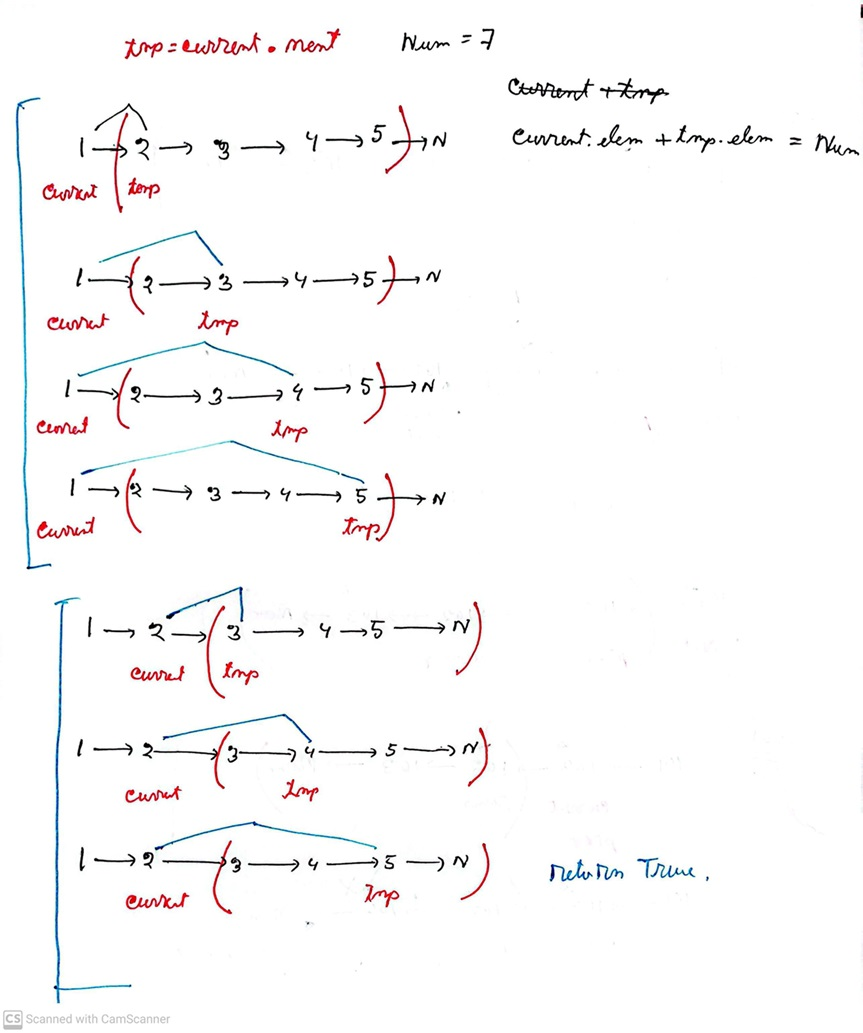

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

def IsSumPossible(head, given_num):
    # Traverse the list starting from the head
    current = head # i = 0
    while current != None:
        # For each node, traverse all subsequent nodes
        temp = current.next # j = i+1
        while temp != None:
            # Check if the sum of current and temp node values equals n
            if current.value + temp.value == given_num:
                print(current.value, "+", temp.value, "=", given_num)
                return True
            temp = temp.next # j = j + 1
        current = current.next # i = i + 1

    # If no pair is found, return False
    return False

# Helper function to print the linked list (for testing)
def print_linked_list(head):
    current = head
    while current != None:
        print(current.value, end=" → " if current.next else "")
        current = current.next
    print()

# Example Usage:
# Create linked list 1 → 2 → 3 → 4 → 5
elements = [1 , 2 , 3 , 4 , 5]
head = create_linked_list(elements)

# Test the IsSumPossible function
print(IsSumPossible(head, 7))  # Output: True (3 + 4 = 7 or 2 + 5 = 7)

# Test with other examples
# Create linked list 1 → 2 → 4 → 5 → 6
elements = [1 , 2 , 4 , 5, 6]
head2 = create_linked_list(elements)

print(IsSumPossible(head2, 4))  # Output: False (no two elements sum to 4)

head3 = Node(5)
print(IsSumPossible(head3, 5))  # Output: False (only one element in the list)

2 + 5 = 7
True
False
False


## Fall23- Q2
You are given two linked lists of the same even length. Your task is to complete a method `pairwiseEqual()` that takes two singly linear linked list heads as arguments, checks if the linked lists are equal pairwise, and returns `True` or `False`.

Two linked lists will be equal pairwise if the node values of every pair in Linked List 1 are equal to the node values of the corresponding pair in Linked List 2, irrespective of their sequence [i.e., the sequence does not matter].

**[DO NOT USE OTHER DATA STRUCTURE OTHER THAN GIVEN LINKED LISTS]**

### Sample Input and Output:

| **Input Linked List 1**      | **Input Linked List 2**      | **Returned Value** | **Explanation**                                                                                                                                           |
|------------------------------|------------------------------|--------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| `10 --> 15 --> 34 --> 41`    | `15 --> 10 --> 34 --> 41`    | `True`             | Linked List 1 Pairs: (10,15), (34,41); Linked List 2 Pairs: (15,10), (34,41)                                                                                             |
| `10 --> 15 --> 34 --> 42`    | `15 --> 10 --> 34 --> 41`    | `False`            | Linked List 1 Pairs: (10,15), (34,42); Linked List 2 Pairs: (15,10), (34,41)                                                                                             |


In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

def pairwiseEqual(head1, head2):
    # Get pairs from both linked lists
    while head1 and head2.next:
        L1_elem1 = head1.value
        L1_elem2 = head1.next.value

        L2_elem1 = head2.value
        L2_elem2 = head2.next.value

        # Check if the pairs are equal irrespective of the order
        if not ((L1_elem1 == L2_elem1 and L1_elem2 == L2_elem2) or
                (L1_elem1 == L2_elem2 and L1_elem2 == L2_elem1)):
            return False

        # Move to the next pair i = i+2
        head1 = head1.next.next
        head2 = head2.next.next

        # Ensure both lists are fully traversed and of the same length
    return head1 is None and head2 is None

# Helper function to print the linked list (for testing)
def print_linked_list(head):
    current = head
    while current is not None:
        print(current.value, end=" -> " if current.next else "")
        current = current.next
    print()

# Test Case 1
elements = [10 , 15, 34, 41]
head1 = create_linked_list(elements)

elements = [15, 10, 34, 41]
head2 = create_linked_list(elements)

print("Test Case 1:")
print(pairwiseEqual(head1, head2))  # Expected output: True

# Test Case 2
elements = [10 , 15, 34, 42]
head1 = create_linked_list(elements)

elements = [10 , 15, 34, 41]
head2 = create_linked_list(elements)

print("Test Case 2:")
print(pairwiseEqual(head1, head2))  # Expected output: False

Test Case 1:
True
Test Case 2:
False


In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

# Separate get_pairs function
def get_pairs(head):
    pairs = []
    while head and head.next:
        pairs.append({head.value, head.next.value})  # Using set to avoid order issues

        head = head.next.next  # Move to the next pair i = i + 1
    return pairs

def pairwiseEqual(head1, head2):
    # Get pairs from both linked lists
    pairs1 = get_pairs(head1)
    pairs2 = get_pairs(head2)

    # Sort the pairs and compare
    return sorted(pairs1) == sorted(pairs2)

# Helper function to print the linked list (for testing)
def print_linked_list(head):
    current = head
    while current is not None:
        print(current.value, end=" -> " if current.next else "")
        current = current.next
    print()

# Test Case 1
elements = [10 , 15, 34, 41]
head1 = create_linked_list(elements)

elements = [15, 10, 34, 41]
head2 = create_linked_list(elements)

print("Test Case 1:")
print(pairwiseEqual(head1, head2))  # Expected output: True

# Test Case 2
elements = [10 , 15, 34, 42]
head1 = create_linked_list(elements)

elements = [10 , 15, 34, 41]
head2 = create_linked_list(elements)

print("Test Case 2:")
print(pairwiseEqual(head1, head2))  # Expected output: False

Test Case 1:
True
Test Case 2:
False


## Summer24--Q2: remove duplicates

Suppose, you are working on a web application which has a customer support system. You are assigned to handle the customer support tickets. The support tickets are stored in a non-dummy headed singly linear linked list on a first-come first-served basis by IDs. However, due to a glitch, some tickets have been duplicated. Now, your task is to complete the given method `remove_Duplicates(head)` which takes the head of the linked list as input to remove the duplicate IDs ensuring that each ticket appears only once.

**[DO NOT USE OTHER DATA STRUCTURE OTHER THAN GIVEN LINKED LIST]**

### Sample Input and Output:

| **Input Tickets**                                      | **Fixed Tickets**                          | **Explanation**                                                                 |
|--------------------------------------------------------|--------------------------------------------|---------------------------------------------------------------------------------|
| `101 -> 103 -> 101 -> 102 -> 103 -> 104 -> 105 -> 105` | `101 -> 103 -> 102 -> 104 -> 105`          | All the duplicates of `101`, `103`, and `105` have been removed.               |
| `102 -> 101 -> 101 -> 102 -> 102 -> 102 -> 103 -> 104 -> 104` | `102 -> 101 -> 103 -> 104`                  | All the duplicates of `102`, `101`, and `104` have been removed.               |


In [ ]:
class Node:
    def __init__(self, elem=0, next=None):
        self.elem= elem
        self.next = next

def remove_Duplicates(head):
    current = head
    while current!= None:
        runner = current
        while runner.next!=None:
            if runner.next.elem== current.elem:
                runner.next = runner.next.next  # Remove duplicate
            else:
                runner = runner.next  # Move runner forward
        current = current.next  # Move current forward
    return head


def print_list(head):
    current = head
    while current:
        print(current.elem, end=" -> " if current.next else "\n")
        current = current.next

# Example Usage
def create_linked_list(arr):
    if not arr:
        return None
    head = Node(arr[0])
    current = head
    for val in arr[1:]:
        current.next = Node(val)
        current = current.next
    return head

# Test Case 1:
# Create linked list 101 -> 103 -> 101 -> 102 -> 103 -> 104 -> 105 -> 105
elements = [101 , 103 , 101 ,102 , 103 , 104 , 105 , 105]
head1 = create_linked_list(elements)


# Print original list
print("Original Tickets (Test Case 1):")
print_list(head1)

# Remove duplicates
head1 = remove_Duplicates(head1)

# Print fixed list
print("Fixed Tickets (Test Case 1 - Duplicates removed):")
print_list(head1)

# Test Case 2:
# Create linked list 102 -> 101 -> 101 -> 102 -> 102 -> 102 -> 103 -> 104 -> 104
elements = [102 , 101 , 101 , 102 , 102 , 102 , 103 , 104 , 104]
head2 = create_linked_list(elements)

# Print original list
print("\nOriginal Tickets (Test Case 2):")
print_list(head2)

# Remove duplicates
head2 = remove_Duplicates(head2)

# Print fixed list
print("Fixed Tickets (Test Case 2 - Duplicates removed):")
print_list(head2)


Original Tickets (Test Case 1):
101 -> 103 -> 101 -> 102 -> 103 -> 104 -> 105 -> 105
Fixed Tickets (Test Case 1 - Duplicates removed):
101 -> 103 -> 102 -> 104 -> 105

Original Tickets (Test Case 2):
102 -> 101 -> 101 -> 102 -> 102 -> 102 -> 103 -> 104 -> 104
Fixed Tickets (Test Case 2 - Duplicates removed):
102 -> 101 -> 103 -> 104


##Fall 2023 FInal Q2 (LL): sum_dist(list, arr)

 You are given a Linked List, LL1, and an array, dist.

 Write a method sum_dist(list, arr) that  takes a Linked List and an array as parameters. This method sums the node elements in the  linked list that are away from the head by the elements in the array and returns the sum.

 Assume the Node class has only elem and next variable. No need to write Node class and driver code.  

| **Sample Input**      | **Sample Output** |
|------------------------|-------------------|
| **LL1**: 10 --> 16 --> -5 --> 9 --> 3 --> 4  | 4                 |
| **dist**: [2, 0, 5, 2, 8]                   |                   |

---

### **Explanation**

| Distance from Head | Node Element         |
|--------------------|----------------------|
| 2                  | -5                  |
| 0                  | 10                  |
| 5                  | 4                   |
| 8                  | Doesn't Exist, Considered as 0 |

The sum is: **-5 + 10 + 4 + -5 + 0 = 4**

**Function Call:**  
`print(sum_dist(LL1, dist))`



In [ ]:
class Node:
    def __init__(self, elem, next=None):
        self.elem= elem
        self.next = next
######################################################

def sum_dist(LL1, dist):
    total_sum = 0

    # Iterate over each distance in the array
    for distance in dist:
        current = LL1 # head of LL with 1st element
        index_counter = 0

        # Traverse the linked list to the node at the given distance
        while current is not None and index_counter < distance:
            current = current.next
            index_counter += 1

        # Add the value of the node at the distance or 0 if it doesn't exist
        if current is None:
            total_sum += 0
        else:
            total_sum += current.elem

    return total_sum



# Creating the linked list: 10 -> 16 -> -5 -> 9 -> 3 -> 4
# LL1 = Node(10, Node(16, Node(-5, Node(9, Node(3, Node(4))))))
elements = [10, 16, -5, 9, 3, 4]
LL1 = create_linked_list(elements)
print_list(LL1)

dist = [2, 0, 5, 2, 8]

# Calling the function
print(sum_dist(LL1, dist))  # Output: 4

10 -> 16 -> -5 -> 9 -> 3 -> 4
4


In [ ]:
def NodeAt(head, index):
    """Returns the node at the given index in the linked list or None if out of bounds."""
    current = head
    count = 0

    # Traverse the linked list until the desired index or end of the list
    while current is not None:
        if count == index:
            return current
        current = current.next
        count += 1

    # If index is out of bounds, return None
    return None


def sum_dist2(LL1, dist):
    total_sum = 0

    # Iterate over each distance in the array
    for distance in dist:
        # Get the node at the given distance using NodeAt
        node = NodeAt(LL1, distance)

        # Add the value of the node at the distance or 0 if it doesn't exist
        if node is None:
            total_sum += 0
        else:
            total_sum += node.elem

    return total_sum


# Creating the linked list: 10 -> 16 -> -5 -> 9 -> 3 -> 4
elements = [10, 16, -5, 9, 3, 4]
LL1 = create_linked_list(elements)
print_list(LL1)

dist = [2, 0, 5, 2, 8]

# Calling the function
print(sum_dist2(LL1, dist))  # Output: 4

10 -> 16 -> -5 -> 9 -> 3 -> 4
4


## Sumemr 2024 Final Q2 (LL): rearrange_Tokens

Suppose, you are in charge of collecting customer tokens in a line and have to store them in a singly linked list in a first-come, first-served order. Your company's policy is to serve senior citizens first, but you noticed they were standing towards the back, and you know their starting positions. Your task is to rearrange the tokens in a way so that senior citizens are moved to the front.

Implement the method named `rearrange_Tokens(head, seniorPos)`, which takes the head of the linked list and the starting position of the senior citizens. It rearranges senior citizens to the front and others to the back and returns the rearranged linked list’s head. If the senior position is invalid, return the original list unchanged.

**[DO NOT USE OTHER DATA STRUCTURE OTHER THAN GIVEN LINKED LIST]**

| **Tokens List**                              | **Senior Citizen Position** | **Rearranged Tokens List**                        | **Explanation**                                                                                                                                                          |
|----------------------------------------------|-----------------------------|---------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| A3 → A9 → A4 → A2 → A7 → A8 → A1           | 4                           | A2 → A7 → A8 → A1 → A3 → A9 → A4                  | Senior citizens start from position 4, so all tokens from position 4 to the end of the list were moved to the front, and others are placed behind.                        |
| A9 → A3 → A4 → A8 → A6 → A5                 | 5                           | A6 → A5 → A9 → A3 → A4 → A8                       | Senior citizens start from position 5, so all tokens from position 5 to the end of the list were moved to the front, and others are placed behind.                        |




In [ ]:
class Node:
    def __init__(self, elem, next=None):
        self.elem = elem  # Store the element value
        self.next = next  # Reference to the next node in the list


def rearrange_Tokens(head, seniorPos):
    # Handle invalid seniorPos (if less than 1)
    if seniorPos < 1:
        return head  # Return the original list if the position is invalid

    # Initialize pointers for non-senior citizens
    non_senior_start_node = head  # The start node of non-senior tokens
    non_senior_end_node = None  # The end node of non-senior tokens
    non_senior_end = seniorPos - 1  # Position of the last non-senior token

    # Initialize pointers for senior citizens
    senior_start_node = None  # The start node of senior tokens
    senior_end_node = None  # The end node of senior tokens

    current = head  # Start traversing from the head of the list
    count = 1  # Counter to track the current position in the list

    # Traverse the list to find the end node of non-senior citizens
    while current:
        if count == non_senior_end:
            non_senior_end_node = current  # Store the non-senior end node
            break
        current = current.next  # Move to the next node
        count += 1  # Increment the counter

    # The first senior citizen token starts right after the non-senior tokens
    senior_start_node = non_senior_end_node.next


    print("non_senior_end_node", non_senior_end_node.elem)
    print("senior_start_node", senior_start_node.elem)

    # If the senior citizen position is invalid (list too short or wrong position), return the original list
    if not senior_start_node:
        return head

    # Traverse the senior citizen section to find the last senior token (senior_end_node)
    current = senior_start_node
    while current:
        senior_end_node = current  # Update the senior_end_node
        current = current.next  # Move to the next senior token


    print("senior_end_node", senior_end_node.elem)

    # Rearrange the tokens by connecting the senior citizen section to the front
    senior_end_node.next = non_senior_start_node  # Connect the last senior node to the first non-senior token
    non_senior_end_node.next = None  # End the non-senior token list by setting its next to None

    head = senior_start_node  # The head of the list is now the first senior citizen token

    return head  # Return the new head of the rearranged linked list

# Utility function to print the linked list for visualization
def print_linked_list(head):
    current = head  # Start from the head of the list
    while current:
        print(current.elem, end=" → ")  # Print the element of the current node
        current = current.next  # Move to the next node
    print("None")  # End of list

########################################################################################
########################################################################################
# Test Case 1:
# Create linked list A3 → A9 → A4 → A2 → A7 → A8 → A1
elements = ["A3", "A9" ,  "A4" , "A2" , "A7" , "A8", "A1"]
head = create_linked_list(elements)

print("Original Tokens List:")
print_linked_list(head)

# Set senior position to 4 (i.e., senior citizens start at position 4)
seniorPos = 4
print(f"\nRearranging tokens with senior citizens starting at position {seniorPos}...")
head = rearrange_Tokens(head, seniorPos)  # Call the rearrange function

print("\nRearranged Tokens List:")
print_linked_list(head)  # Print the rearranged list

print('-'*50)

# Second test case: Create the linked list A9 → A3 → A4 → A8 → A6 → A5
elements = ["A9","A3","A4","A8","A6","A5"]
head2 = create_linked_list(elements)
print("Original Tokens List:")
print_linked_list(head2)

# Set senior position to 5 (i.e., senior citizens start at position 5)
seniorPos = 5
print(f"\nRearranging tokens with senior citizens starting at position {seniorPos}...")
head2 = rearrange_Tokens(head2, seniorPos)  # Call the rearrange function

print("\nRearranged Tokens List:")
print_linked_list(head2)  # Print the rearranged list

Original Tokens List:
A3 → A9 → A4 → A2 → A7 → A8 → A1 → None

Rearranging tokens with senior citizens starting at position 4...
non_senior_end_node A4
senior_start_node A2
senior_end_node A1

Rearranged Tokens List:
A2 → A7 → A8 → A1 → A3 → A9 → A4 → None
--------------------------------------------------
Original Tokens List:
A9 → A3 → A4 → A8 → A6 → A5 → None

Rearranging tokens with senior citizens starting at position 5...
non_senior_end_node A8
senior_start_node A6
senior_end_node A5

Rearranged Tokens List:
A6 → A5 → A9 → A3 → A4 → A8 → None


In [ ]:
class Node:
    def __init__(self, elem, next=None):
        self.elem = elem  # Store the element value
        self.next = next  # Reference to the next node in the list


def NodeAt(head, index):
    """Returns the node at the given index in the linked list (1-based index) or None if out of bounds."""
    current = head
    count = 1  # Start counting from position 1
    while current:
        if count == index:
            return current
        current = current.next
        count += 1
    return None  # Return None if index is out of bounds


def rearrange_Tokens(head, seniorPos):
    # Handle invalid seniorPos (if less than 1)
    if seniorPos < 1:
        return head  # Return the original list if the position is invalid

    # Get the non-senior end node (node at position seniorPos - 1)
    non_senior_end_node = NodeAt(head, seniorPos - 1)

    # If non_senior_end_node is None, it means the list is too short or seniorPos is invalid
    if not non_senior_end_node:
        return head

    # Get the start node of the senior citizens (node at position seniorPos)
    senior_start_node = non_senior_end_node.next

    # If senior_start_node is None, it means there are no senior tokens
    if not senior_start_node:
        return head

    # Find the last node in the senior citizen section--Run till None
    current = senior_start_node
    while current.next:
        current = current.next
    senior_end_node = current

    # Rearrange the list
    senior_end_node.next = head  # Connect the last senior node to the start of the non-senior list
    non_senior_end_node.next = None  # End the non-senior list
    head = senior_start_node  # Update head to point to the senior citizen section

    return head  # Return the new head of the rearranged linked list


# Utility function to print the linked list for visualization
def print_linked_list(head):
    current = head  # Start from the head of the list
    while current:
        print(current.elem, end=" → ")  # Print the element of the current node
        current = current.next  # Move to the next node
    print("None")  # End of list


########################################################################################
# Test Case 1:
# Create linked list A3 → A9 → A4 → A2 → A7 → A8 → A1
elements = ["A3", "A9" ,  "A4" , "A2" , "A7" , "A8", "A1"]
head = create_linked_list(elements)

print("Original Tokens List:")
print_linked_list(head)

# Set senior position to 4 (i.e., senior citizens start at position 4)
seniorPos = 4
print(f"\nRearranging tokens with senior citizens starting at position {seniorPos}...")
head = rearrange_Tokens(head, seniorPos)  # Call the rearrange function

print("\nRearranged Tokens List:")
print_linked_list(head)  # Print the rearranged list

print('-'*50)

# Second test case: Create the linked list A9 → A3 → A4 → A8 → A6 → A5
elements = ["A9","A3","A4","A8","A6","A5"]
head2 = create_linked_list(elements)
print("Original Tokens List:")
print_linked_list(head2)

# Set senior position to 5 (i.e., senior citizens start at position 5)
seniorPos = 5
print(f"\nRearranging tokens with senior citizens starting at position {seniorPos}...")
head2 = rearrange_Tokens(head2, seniorPos)  # Call the rearrange function

print("\nRearranged Tokens List:")
print_linked_list(head2)  # Print the rearranged list


Original Tokens List:
A3 → A9 → A4 → A2 → A7 → A8 → A1 → None

Rearranging tokens with senior citizens starting at position 4...

Rearranged Tokens List:
A2 → A7 → A8 → A1 → A3 → A9 → A4 → None
--------------------------------------------------
Original Tokens List:
A9 → A3 → A4 → A8 → A6 → A5 → None

Rearranging tokens with senior citizens starting at position 5...

Rearranged Tokens List:
A6 → A5 → A9 → A3 → A4 → A8 → None


## Fall23- Q3 (1): Simulation

DH (dummy head) → 10 → 20 → 30 → 40 → DH

```
for i in range(5):             # Loop from 0 to 4 (i = 0, 1, 2, 3, 4)
    for j in range(i):         # Loop j from 0 to i-1
        n1 = dh.next           # n1 is the node after the dummy head (starting with 10)
        n2 = n1.next            # n2 is the node after n1 (starting with 20)
        n3 = dh.prev            # n3 is the node before the dummy head (starting with 40)
        
        dh.next = n2           # Set the next of dummy head to n2 (removes n1 from the list)
        n2.prev = dh           # Set the prev of n2 to dummy head (connects n2 back to DH)
        n3.next = n1           # Set the next of n3 (40) to n1 (10), making it point to n1
        n1.next = dh           # Set the next of n1 to dummy head, making n1 point to DH
        n1.prev = n3           # Set the prev of n1 to n3 (40), connecting n1 back to n3
        dh.prev = n1           # Set the prev of dummy head to n1, making it point to the last element (n1 = 10)

```



In [ ]:
# Defining the node class
class Node:
    def __init__(self, elem, next=None, prev=None):
        self.elem = elem # The element that we want to put in the list
        self.next = next # The reference to the next node in the list
        self.prev = prev # The reference to the previous node in the list

def printLL_forward(head):
    print("Forward Printing: ",end='')
    current_node = head.next
    while current_node!=head:
        print(current_node.elem, end=' -> ')
        current_node = current_node.next
    print("END")

import numpy as np

def create_doubly_circular_LL(arr):
    # State 1 of the image above
    head = Node(None)  # Dummy head node

    current_node = head # here, current_node is tail
    for i in range(0, len(arr), 1):
        newNode = Node(arr[i])

        current_node.next = newNode  # Link current node to new node
        newNode.prev = current_node  # Link new node back to current node
        current_node = newNode  # Move to the new node

    # Making it circular by connecting the last node back to the head
    current_node.next = head
    head.prev = current_node

    return head  # Returning the head of the newly created linked list


arr = np.array([10, 20, 30, 40])
dh = create_doubly_circular_LL(arr)

# printing the newly created linked list
printLL_forward(dh)
print('-'*50)

Forward Printing: 10 -> 20 -> 30 -> 40 -> END
--------------------------------------------------


In [ ]:
for i in range(5):             # Loop from 0 to 4 (i = 0, 1, 2, 3, 4)
    for j in range(i):         # Loop j from 0 to i-1
        n1 = dh.next           # n1 is the node after the dummy head (starting with 10)
        n2 = n1.next            # n2 is the node after n1 (starting with 20)
        n3 = dh.prev            # n3 is the node before the dummy head (starting with 40)

        dh.next = n2           # Set the next of dummy head to n2 (removes n1 from the list)
        n2.prev = dh           # Set the prev of n2 to dummy head (connects n2 back to DH)
        n3.next = n1           # Set the next of n3 (40) to n1 (10), making it point to n1
        n1.next = dh           # Set the next of n1 to dummy head, making n1 point to DH
        n1.prev = n3           # Set the prev of n1 to n3 (40), connecting n1 back to n3
        dh.prev = n1           # Set the prev of dummy head to n1, making it point to the last element (n1 = 10)
        print("-"*50)
        print("j=", j)
        printLL_forward(dh)
    print("X"*50)
    print("i=", i)
    printLL_forward(dh)

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
i= 0
Forward Printing: 10 -> 20 -> 30 -> 40 -> END
--------------------------------------------------
j= 0
Forward Printing: 20 -> 30 -> 40 -> 10 -> END
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
i= 1
Forward Printing: 20 -> 30 -> 40 -> 10 -> END
--------------------------------------------------
j= 0
Forward Printing: 30 -> 40 -> 10 -> 20 -> END
--------------------------------------------------
j= 1
Forward Printing: 40 -> 10 -> 20 -> 30 -> END
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
i= 2
Forward Printing: 40 -> 10 -> 20 -> 30 -> END
--------------------------------------------------
j= 0
Forward Printing: 10 -> 20 -> 30 -> 40 -> END
--------------------------------------------------
j= 1
Forward Printing: 20 -> 30 -> 40 -> 10 -> END
--------------------------------------------------
j= 2
Forward Printing: 30 -> 40 -> 10 -> 20 -> END
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
i= 3
Forward Printing: 30 -> 40

# Multi-dimentional array

## Spring 2024- Q1: sum_difference_of_cols_of_matrix
Lab question

## Fall23 Q1: compress_matrix

Lab task


## Fall2024: Zig-Zack matrix
You have hidden a password into a square matrix for your friend. Only you know that the  
password can be achieved through traversing the array in a zigzag fashion. Now help  
your friend develop a function/method that will take the 2D array as input and print the  
password in the output console.

Complete the function `zig_zag` which will take a NxN 2D array and print all the values in  
a zigzag pattern. Each value will be separated by a space. Assume the function will  
always receive a NxN 2D array. Your code should work for any NxN array.

---

#### Input Array and Expected Output Explanation

|   D   |   B   |   G   |   S   |  
|-------|-------|-------|-------|  
|   A   |   G   |   T   |   S   |  
|   W   |   U   |   R   |   N   |  
|   O   |   H   |   R   |   O   |  

Expected Output (Zigzag Traversal):  
`D A B W G G O U T S H R S R N O`

**Hint:** You need to follow the arrowed line 1 to line 7 to find out the zigzag pattern.  
Use one loop to print the upper triangle (line 1 to 4) and another loop to print the lower  
triangle (line 5 to 7).

---

In [ ]:
def zigzag3(arr):
    rows = len(arr)
    lim = 2 * (rows - 1)

    # Printing upper left triangle
    for line_no in range(rows):  # 0 to rows-1
        for col_no in range(line_no + 1):
            row_no = line_no - col_no
            print(arr[row_no][col_no], end=" ")
        print()

    # Printing lower right triangle
    for line_no in range(rows, lim + 1):  # rows to lim
        for col_no in range(line_no - rows + 1, rows):
            row_no = line_no - col_no
            print(arr[row_no][col_no], end=" ")
        print()

def zigzag2(arr):
    rows = len(arr)      #row=4
    lim = 2*(rows-1)     #lim=6


    #Printing upper left triangle		[5 mark]
    line_no = 0
    while line_no<=rows-1:     #0~3
        row_no = line_no
        col_no = 0
        while col_no<=line_no:
            print(arr[row_no][col_no],end=" ")
            row_no-=1
            col_no+=1
        line_no+=1


    #Printing lower right triangle		[3 mark]
    while line_no<=lim:       #4~6
        row_no = rows-1
        col_no = line_no-row_no
        while col_no<=rows-1:
            print(arr[row_no][col_no],end=" ")
            row_no-=1
            col_no+=1
        line_no+=1


# Example usage
matrix = [
    ['D', 'B', 'G', 'S'],
    ['A', 'G', 'T', 'S'],
    ['W', 'U', 'R', 'N'],
    ['O', 'H', 'R', 'O']
]
zigzag2(matrix)
print('-'*50)
zigzag3(matrix)

D A B W G G O U T S H R S R N O --------------------------------------------------
D 
A B 
W G G 
O U T S 
H R S 
R N 
O 


## Summer 24--ques1: in-place circular rotation

Bob has already learnt about 2D matrices and its operations in the data structures course. However, he is currently facing problems in rotating a 2D square matrix. As such, he has asked you to help him solve the problem.

**You should rotate the original input matrix's outer rows and columns in left, down, right, top manner without affecting the internal cells;** instead of creating a new matrix.

Here, as you can see, if you **rotate the given square matrix anticlockwise**, 1st row will be 1st column, 1st column will be last row, last row will be last column and last column will be 1st row. The elements of the internal cells will be unchanged.

So given a square matrix of size n*n, your task is to complete the given method `rotate(matrix)` that takes a 2D square matrix as an input and returns the rotated matrix using in-place algorithm.

**Hints of in-place:** Rotating by one element at a time instead of an entire row/column should eliminate the need for any supporting data structures.

---

### Sample Input and Output:

#### Example 1:
**Original matrix:**

| 1  | 2  | 3  |
|----|----|----|
| 5  | 6  | 7  |
| 9  | 10 | 11 |

**Rotated matrix:**

| 3  | 7  | 11 |
|----|----|----|
| 2  | 6  | 10 |
| 1  | 5  | 9  |

---

#### Example 2:
**Original matrix:**

| 1  | 2  | 3  | 4  |
|----|----|----|----|
| 5  | 6  | 7  | 8  |
| 9  | 10 | 11 | 12 |
| 13 | 14 | 15 | 16 |

**Rotated matrix:**

| 4  | 8  | 12 | 16 |
|----|----|----|----|
| 3  | 6  | 7 | 15 |
| 2  | 10  | 11 | 14 |
| 1  | 5  | 9  | 13 |

## See the inplace matrix rotation visualisation [here ](https://drive.google.com/file/d/1nj0OIWxfdnVx2OKgMg6KZOaqyra6YHKb/view?usp=sharing)

In [ ]:
def rotate(matrix):
    # As it is a square matrix, the dimension is n x n.
    n = len(matrix)
    last_position = n - 1

    i = 0
    j = last_position

    while True:
        # Perform the rotation
        temp = matrix[0][i]
        matrix[0][i] = matrix[i][last_position]
        matrix[i][last_position] = matrix[last_position][j]
        matrix[last_position][j] = matrix[j][0]
        matrix[j][0] = temp

        # Move to the next set of indices
        i += 1
        j -= 1

        # Break the loop when we reach the middle
        if i == last_position and j == 0:
            break

def print_matrix(matrix):
    # Print the matrix
    for row in matrix:
        print(" | ".join(map(str, row)))

input_matrix = [
    [1, 2, 3, 4, 5],
    [16, 17, 18, 19, 6],
    [15, 24, 25, 20, 7],
    [14, 23, 22, 21, 8],
    [13, 12, 11, 10, 9]
]

print("Before rotation:")
print_matrix(input_matrix)

rotate(input_matrix)

print("After rotation:")
print_matrix(input_matrix)
print('-'*50)

# Input matrix
matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]
print("Original matrix:")
print_matrix(matrix)
rotate(matrix)
print("After rotation:")
print_matrix(matrix)
print('-'*50)

# Example usage
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

print("Original matrix:")
print_matrix(matrix)
rotate(matrix)
print("After rotation:")
print_matrix(matrix)
print('-'*50)

Before rotation:
1 | 2 | 3 | 4 | 5
16 | 17 | 18 | 19 | 6
15 | 24 | 25 | 20 | 7
14 | 23 | 22 | 21 | 8
13 | 12 | 11 | 10 | 9
After rotation:
5 | 6 | 7 | 8 | 9
4 | 17 | 18 | 19 | 10
3 | 24 | 25 | 20 | 11
2 | 23 | 22 | 21 | 12
1 | 16 | 15 | 14 | 13
--------------------------------------------------
Original matrix:
1 | 2 | 3 | 4
5 | 6 | 7 | 8
9 | 10 | 11 | 12
13 | 14 | 15 | 16
After rotation:
4 | 8 | 12 | 16
3 | 6 | 7 | 15
2 | 10 | 11 | 14
1 | 5 | 9 | 13
--------------------------------------------------
Original matrix:
1 | 2 | 3
4 | 5 | 6
7 | 8 | 9
After rotation:
3 | 6 | 9
2 | 5 | 8
1 | 4 | 7
--------------------------------------------------


### Rotate Methods

#### Rotate by +90:
- **Method 1**:
  1. Transpose the matrix.
  2. Reverse each row.

#### Rotate by -90:
- **Method 1**:
  1. Transpose the matrix.
  2. Reverse each column.
- **Method 2**:
  1. Reverse each row.
  2. Transpose the matrix.

#### Rotate by +180:
- **Method 1**:
  1. Rotate by +90 twice.
- **Method 2**:
  1. Reverse each row.
  2. Reverse each column.

#### Rotate by -180:
- **Method 1**:
  1. Rotate by -90 twice.
- **Method 2**:
  1. Reverse each column.
  2. Reverse each row.
- **Method 3**:
  1. Rotate by +180 as they are the same.


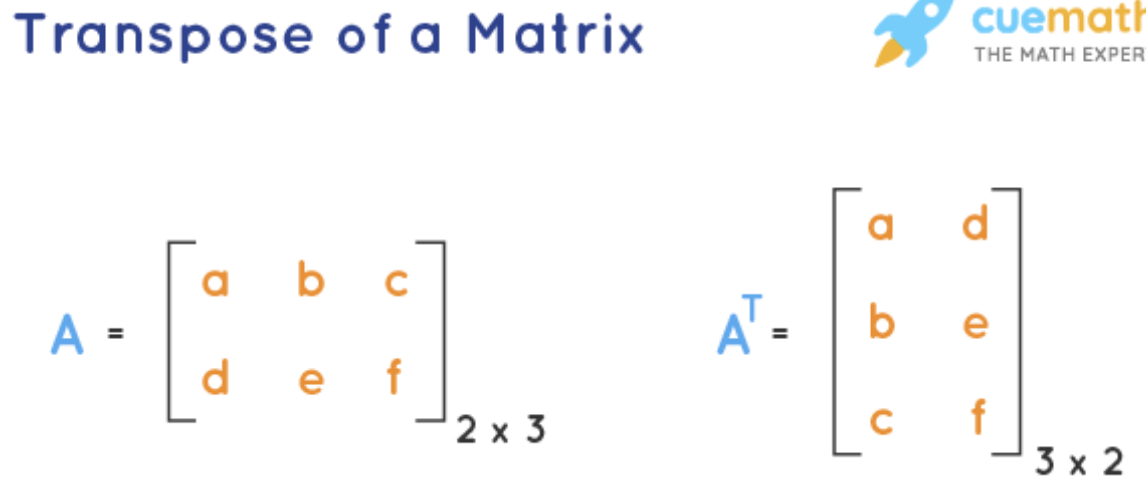

In [ ]:
import numpy as np

def transpose(matrix):
    # Get the number of rows and columns
    rows = len(matrix)          # Number of rows
    cols = len(matrix[0])       # Number of columns

    # Create an empty matrix for the transpose using np.zeros with transposed dimensions
    transposed = np.zeros((cols, rows), dtype=int)

    # Iterate through each element and transpose it
    for row_no in range(rows):       # Iterate through rows of the original matrix
        for col_no in range(cols):   # Iterate through columns of the original matrix
            transposed[col_no][row_no] = matrix[row_no][col_no]  # Swap rows and columns

    return transposed

def print_matrix(matrix):
    # Print the matrix
    for row in matrix:
        print(" | ".join(map(str, row)))

# Example usage
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

print("Original matrix:")
print_matrix(matrix)
transposed_matrix = transpose(matrix)
print("Transposed matrix:")
print_matrix(transposed_matrix)

# Input matrix
matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]
print("Original matrix:")
print_matrix(matrix)
transposed_matrix = transpose(matrix)
print("Transposed matrix:")
print_matrix(transposed_matrix)

Original matrix:
1 | 2 | 3
4 | 5 | 6
7 | 8 | 9
Transposed matrix:
1 | 4 | 7
2 | 5 | 8
3 | 6 | 9
Original matrix:
1 | 2 | 3 | 4
5 | 6 | 7 | 8
9 | 10 | 11 | 12
13 | 14 | 15 | 16
Transposed matrix:
1 | 5 | 9 | 13
2 | 6 | 10 | 14
3 | 7 | 11 | 15
4 | 8 | 12 | 16


In [ ]:
# Rotate by -90:
# Method 2: Using this
# Step01: Reverse each row.
# Step02: Transpose the matrix.
import copy
def reverse_rows(matrix):

    # Step 01: Make a deep copy of the original matrix
    matrix_copy = copy.deepcopy(matrix)

    # Step 02: Reverse each row in the copied matrix
    for row in matrix_copy:
        left = 0
        right = len(row) - 1
        while left < right:
            # Swap using a temporary variable
            temp = row[left]
            row[left] = row[right]
            row[right] = temp
            left += 1
            right -= 1
    return matrix_copy

def rotate_minus90(matrix):
     # Step01: reversing reach row
    rev_rows_matrix = reverse_rows(matrix)

    # Step02: transposing the matrix
    transposed_matrix= transpose(rev_rows_matrix)
    return transposed_matrix

def print_matrix(matrix):
    # Print the matrix
    for row in matrix:
        print(" | ".join(map(str, row)))


# Input matrix
matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

# Rotate the matrix
print("Original matrix")
print_matrix(matrix)
rotated_matrix = rotate_minus90(matrix)
print("Rotated matrix")
print_matrix(rotated_matrix)

# Input matrix
matrix = [
    [1, 2, 3],
    [5, 6, 7],
    [9, 10, 11]
]
# Rotate the matrix
print("Original matrix")
print_matrix(matrix)
rotated_matrix = rotate_minus90(matrix)
print("Rotated matrix")
print_matrix(rotated_matrix)

Original matrix
1 | 2 | 3 | 4
5 | 6 | 7 | 8
9 | 10 | 11 | 12
13 | 14 | 15 | 16
Rotated matrix
4 | 8 | 12 | 16
3 | 7 | 11 | 15
2 | 6 | 10 | 14
1 | 5 | 9 | 13
Original matrix
1 | 2 | 3
5 | 6 | 7
9 | 10 | 11
Rotated matrix
3 | 7 | 11
2 | 6 | 10
1 | 5 | 9


In [ ]:
def copy_inner_matrix(matrix, copy_matrix):
    # Dimensions of the matrix
    rows = len(matrix)
    cols = len(matrix[0])

    # Copy inner elements to the new matrix
    for i in range(1, rows - 1):           # Iterate through inner rows
        for j in range(1, cols - 1):       # Iterate through inner columns
            copy_matrix[i][j] = matrix[i][j]  # Copy the inner element

    return copy_matrix

# Example usage
matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]
 # Create a new matrix filled with zeros, same size as the original
empty_matrix = np.zeros((len(matrix), len(matrix)), dtype=int)

new_matrix = copy_inner_matrix(matrix, empty_matrix)
for row in new_matrix:
    print(row)

[0 0 0 0]
[0 6 7 0]
[ 0 10 11  0]
[0 0 0 0]


In [ ]:
# Mid question
def rotate_mid(original_matrix):

    # STep-01, 02: minus-90 rotation
    # Step01: reverse rows
    rev_rows_matrix = reverse_rows(original_matrix)

    # Step02: transposing the matrix
    transposed_matrix= transpose(rev_rows_matrix)

    # print("transposed reversed(-90 rotated) matrix")
    # print_matrix(transposed_matrix)

    # print("Original matrix")
    # print_matrix(original_matrix)

    # Step3: copy back the inner part
    ans = copy_inner_matrix(original_matrix, transposed_matrix)
    # print("ans matrix")
    # print_matrix(ans)
    return ans

def print_matrix(matrix):
    # Print the matrix
    for row in matrix:
        print(" | ".join(map(str, row)))


# Input matrix
matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

# Rotate the matrix
print("Original matrix")
print_matrix(matrix)
ans = rotate_mid(matrix)
print("Mid ans matrix")
print_matrix(ans)

# Input matrix
matrix = [
    [1, 2, 3],
    [5, 6, 7],
    [9, 10, 11]
]
# Rotate the matrix
print("Original matrix")
print_matrix(matrix)
ans = rotate_mid(matrix)
print("Mid ans matrix")
print_matrix(ans)

Original matrix
1 | 2 | 3 | 4
5 | 6 | 7 | 8
9 | 10 | 11 | 12
13 | 14 | 15 | 16
Mid ans matrix
4 | 8 | 12 | 16
3 | 6 | 7 | 15
2 | 10 | 11 | 14
1 | 5 | 9 | 13
Original matrix
1 | 2 | 3
5 | 6 | 7
9 | 10 | 11
Mid ans matrix
3 | 7 | 11
2 | 6 | 10
1 | 5 | 9
